***************

## [Final_project] 전체 데이터 병합

***************

### 🌧️ 필요한 패키지 설치 및 불러오기

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import statsmodels.api as sm

## 에러문구 없애기
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.8f}'.format

## 한글깨짐 방지
plt.rc('font', family='NanumBarunGothic')

In [ ]:
'''
# 한글 폰트 설치 런타임 재시작 이후 셀 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,801 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and dire

### 🌧️ 데이터 불러오기

In [ ]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 원하는 위치로 경로 바꾸기
# 본인이 만든 폴더 위치를 사용
%cd /content/drive/MyDrive/final_project/data

/content/drive/MyDrive/final_project/data


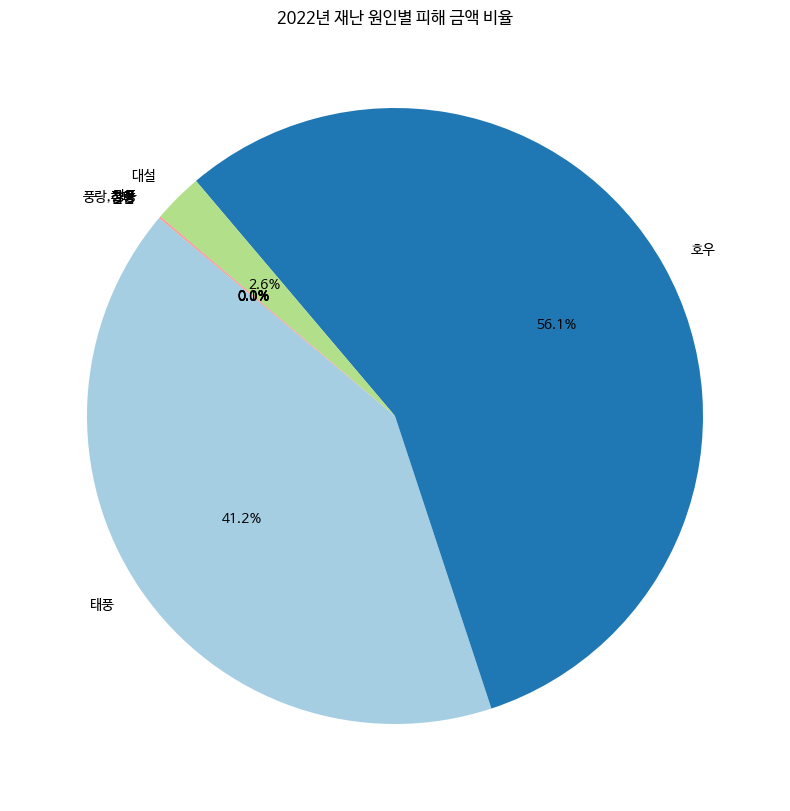

In [ ]:
import matplotlib.pyplot as plt

# 2022년 데이터 준비
disasters = ['태풍', '호우', '대설', '강풍', '풍랑,강풍', '한파', '폭염']
damage_amounts = [
    244046077.00, 332559355.00, 15439292.00, 26000.00, 585497.00, 0.00, 0.00
]

# 파이 차트 생성
plt.figure(figsize=(10, 10))
plt.pie(damage_amounts, labels=disasters, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# 제목 설정
plt.title('2022년 재난 원인별 피해 금액 비율')

plt.show()

In [ ]:
# 데이터 불러오기
'''
건물면적.csv
법정동명
건물면적_분포구간 : 건물면적(km)의 값들을 백분위수로 4개의 구간으로 나눈 값
건물면적_구간별_분포수 : 행정동별 건물면적 구간별 분포수
구간별_30년_이상_건물_수 : 건물면적 구간별 30년 이상 된 노후건물 수
구간별_지하_건물_수 : 건물면적 구간별 지하층이 1개 이상인 건물 수
구간별_평균_높이 : 건물면적 구간별 건물 평균 높이
자치구

============================================================================================

녹지.csv

자치구
총개소수 : 해당 자치구에 있는 녹지의 총 개소 수(모든 녹지 공간의 총 개수)
총면적 : 해당 자치구의 전체 녹지 면적
시설녹지_개소수 : 시설 녹지의 개소 수 (시설녹지 : 도시 내의 공원, 정원 등 설계된 녹지 공간)
시설녹지_면적 : 시설 녹지의 면적
일반녹지_개소수 : 일반 녹지의 개소 수 (일반녹지 : 특정한 시설이 아닌 자연적인 녹지 공간)
일반녹지_면적 : 일반 녹지의 면적
기타녹지_개소수 : 기타 녹지의 개소 수
기타녹지_면적 : 기타 녹지의 면적
녹지율 : 녹지율은 도시계획구역 전체 면적에 대한 녹지의 비율(녹지면적의 크기를 평가하는 기준으로 토지이용상 녹지(임목지, 자연초지, 공원, 시설녹지, 하천)에 해당되는 지역에 대한 면적률을 의미)

============================================================================================

불투수율.csv

불투수율 : 빗물이 투과하지 못하는 지면의 비율

자치구
구전체면적 : 자치구별 총 면적
불투수면적 : 불투수면적
불투수면적 비율 : 불투수율

침지형데이터.csv

침수평균해발고도
지형높이코드 : 지형높이를 0~5구간으로 나눈 코드
하천거리 : 행정동 중심으로부터 하천까지의 거리
하천면적비율 : 행정동의 하천면적 비율

============================================================================================

행정단위_면적당_암거_측구_개수.csv


자치구
행정동
면적당 암거 개수: 면적(Km2) / 암거 수 >> 지하에 매설한 인공수로

면적당 개거 개수: 면적(Km2) / 개거 수 >> 위를 덮지 않고 그대로 터놓은 수로 (개수로)

면적당 관거 개수: 면적(Km2) / 관거 수 >> 상수나 하수, 우수 따위가 흘러가도록 만든 관

면적당 측구 개수:  면적(Km2) / 측구 수 -비가 올 때 도로 표면에서 빗물이 원활하게 빠질 수 있도록 , 도로경계선과 평행하게 설계된 배수시설

면적당 횡단하수거 개수: 면적(Km2) / 횡단하수거 수 >> 횡단보도 하수구(?)
면적당 맨홀 개수: 면적(Km2) / 맨홀 수>> 지하 수도관,하수도 배선 등을 점검, 수리 또는 청소하기위해 사람이 드나들 수 있도록 만든 구멍

면적당 빗물받이 개수: 면적(Km2) / 빗물받이 수 >> 빗물이나 도로에 흘러내린 물을 하수관으로 흘려보내는 시설

법정동명 - 수형님 데이터 합치기 위해 만듦
면적(Km2) - 자치구 행정동 해당 면적

============================================================================================

빗물펌프거리.csv

빗물펌프장 : 홍수에 따른 침수를 막기 위해서 빗물을 강제적으로 하천이나 강으로 퍼내는 시설

Columns

법정동명
자치구
빗물펌프거리 : 행정동 중심점으로부터 빗물펌프장까지의 거리 (Km)

============================================================================================

서울시_시간별_강수량.csv

구 단위 시간별 누적강수량(3시간 누적 강수량,6시간 누적 강수량 등등) (mm)

============================================================================================

'''
raw = pd.read_csv('건물면적.csv',encoding='utf-8-sig')
raw2 = pd.read_csv('녹지.csv',encoding='utf-8-sig')
raw3 = pd.read_csv('불투수율.csv',encoding='utf-8-sig')
raw4 = pd.read_csv('빗물펌프거리.csv',encoding='utf-8-sig')
raw5 = pd.read_csv('침수지형데이터_ver_fin.csv',encoding='utf-8-sig')
raw6 = pd.read_csv('행정단위_면적당_암거_측구_개수.csv',encoding='utf-8-sig')
raw7 = pd.read_csv('서울시_시간별_강수량.csv',encoding='utf-8-sig')

In [ ]:
df = raw.copy()
df2 = raw2.copy()
df3 = raw3.copy()
df4 = raw4.copy()
df5 = raw5.copy()
df6 = raw6.copy()
df7 = raw7.copy()

In [ ]:
print(df.info()) # 자치구
print('-'*100)
print(df2.info()) # 자치구
print('-'*100)
print(df3.info())  # 자치구
print('-'*100)
print(df4.info())  # 법정동명 > 법정동서 자치구 파생변수 설정
print('-'*100)
print(df5.info()) # 구단위 > 자치구
print('-'*100)
print(df6.info()) # 법정동명 > 법정동서 자치구 파생변수 설정
print('-'*100)
print(df7.info()) # 자치구

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   법정동명             1856 non-null   object 
 1   건물면적_분포구간        1856 non-null   object 
 2   건물면적_구간별_분포수     1856 non-null   int64  
 3   구간별_30년_이상_건물_수  1856 non-null   int64  
 4   구간별_지하_건물_수      1856 non-null   int64  
 5   구간별_평균_높이(m)     1856 non-null   float64
 6   자치구              1856 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 101.6+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       25 non-null     object 
 1   총개소수      25 non-null     float64
 2   총면적       25 non-null     float64
 3   시설녹지_개소

In [ ]:
df.head(1)

,법정동명,건물면적_분포구간,건물면적_구간별_분포수,구간별_30년_이상_건물_수,구간별_지하_건물_수,구간별_평균_높이(m),자치구
0,서울특별시 강남구 개포동,0 - 148,9,5,6,9.86666667,강남구


In [ ]:
df2.head(1)

,자치구,총개소수,총면적,시설녹지_개소수,시설녹지_면적,일반녹지_개소수,일반녹지_면적,기타녹지_개소수,기타녹지_면적,녹지율
0,종로구,680.00000000,228451.00000000,22.00000000,53857.00000000,493.00000000,109386.00000000,56.00000000,15755.00000000,78.35290719


In [ ]:
df3.head(1)

,자치구,구전체면적,불투수면적,불투수면적 비율
0,종로구,2312.400,971.600,42.020


In [ ]:
df4.head(1)
# 데이터에서 'Unnamed: 0' 컬럼 제거
df4 = df4.drop(columns=['Unnamed: 0']) ; df4.head(1)

,법정동명,자치구,빗물펌프거리
0,서울특별시 종로구 사직동,종로구,4.05560738


In [ ]:
df5.head(1)
# 컬럼명 Unnamed:0 제거
# 컬럼명 구단위 >> 자치구로 변경
# df5 자치구로 join하기

# 첫 번째 열 제거
df5 = df5.iloc[:, 1:]

# '구단위' 열 이름을 '자치구'로 변경
df5 = df5.rename(columns={'구단위': '자치구'})

# 결과 확인
df5.head(1)


,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,지오메트리,침수연도,침수 발생여부,법정동명,지형높이코드,지형높이,하천_거리,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
0,강북구,0.02000000,2022년 8.8 ~17. 호우,114.53000000,3876.00000000,20220808,20220808,18,23,내수침수,...,"POLYGON ((956425.1271956386 1963792.043624141,...",2022,0,서울특별시 강북구 우이동,2.00000000,평지,354.28741074,17.09821981,0.12192224,0.00713070


In [ ]:
df6.head(1)
# 행정동 면적 면적당개수.. 보류

,자치구,행정동,암거,개거,관거,측구,횡단하수거,맨홀,빗물받이,법정동명,면적(km2),면적당 암거 개수,면적당 측구 개수,면적당 개거 개수,면적당 관거 개수,면적당 횡단하수거 개수,면적당 맨홀 개수,면적당 빗물받이 개수
0,종로구,가회동,1014,255,10922,0,30,404,598,서울특별시 종로구 가회동,0.54000000,1877.78000000,0.00000000,472.22000000,20225.93000000,55.56000000,748.15000000,1107.41000000


In [ ]:
df7.head(1)

,관측소번호,관측소명,날짜,강수량(mm)
0,414,종로구,2018-01-01 00:00,0.00000000


In [ ]:
df7['날짜'] = pd.to_datetime(df7['날짜'].astype(str))
# 자치구별로 x시간 동안의 누적 강수량 계산 (향후 축소 가능)
df7 = df7.sort_values(by=['관측소명', '날짜'])
df7['3시간누적강수량'] = df7.groupby('관측소명')['강수량(mm)'].rolling(window=3, min_periods=1).sum().reset_index(level=0, drop=True)
df7['6시간누적강수량'] = df7.groupby('관측소명')['강수량(mm)'].rolling(window=6, min_periods=1).sum().reset_index(level=0, drop=True)
df7['9시간누적강수량'] = df7.groupby('관측소명')['강수량(mm)'].rolling(window=9, min_periods=1).sum().reset_index(level=0, drop=True)
df7['12시간누적강수량'] = df7.groupby('관측소명')['강수량(mm)'].rolling(window=12, min_periods=1).sum().reset_index(level=0, drop=True)
df7['24시간누적강수량'] = df7.groupby('관측소명')['강수량(mm)'].rolling(window=24, min_periods=1).sum().reset_index(level=0, drop=True)
df7['36시간누적강수량'] = df7.groupby('관측소명')['강수량(mm)'].rolling(window=36, min_periods=1).sum().reset_index(level=0, drop=True)
df7['48시간누적강수량'] = df7.groupby('관측소명')['강수량(mm)'].rolling(window=48, min_periods=1).sum().reset_index(level=0, drop=True)

### 🌧️ 데이터 병합

### 상관관계 확인

In [ ]:
# 자치구 기준 병합 과정 최적화 예제

# 1. 건물 데이터 병합
merged_df = pd.merge(df5, df, on='자치구', how='left')

# 2. 녹지 데이터 병합
merged_df = pd.merge(merged_df, df2, on='자치구', how='left')

# 3. 불투수율 데이터 병합
merged_df = pd.merge(merged_df, df3, on='자치구', how='left')

# 4. 빗물펌프거리 데이터 병합 (법정동명에서 자치구 파생변수 설정 후 병합)
#df4['법정동명'] = df4['법정동명'].str.strip()  # 혹시 모를 공백 제거
#merged_df = pd.merge(merged_df, df4[['법정동명', '자치구', '빗물펌프거리']], on='자치구', how='left')
#print("빗물펌프거리 데이터 병합 후:\n", merged_df.info())

# 5. 행정동 면적당 암거, 측구 데이터 병합
#merged_df = pd.merge(merged_df, df6, on='자치구', how='left')

# 6.

# 7. 강수량 데이터 병합
#새 컬럼 필요...(날짜데이터 합친 년월일+시 데이터)
merged_df['날짜'] = pd.to_datetime(merged_df['침수시작날짜'].astype(str) + merged_df['침수시작시간'].astype(str).apply(lambda x: x.zfill(2)),
                             format = '%Y%m%d%H')
merged_df = pd.merge(merged_df, df7, how='left', left_on=['날짜', '자치구'], right_on=['날짜', '관측소명'])
merged_df = merged_df.drop(columns=['관측소명','관측소번호'])

# 필요 시 추가적인 결측값 처리 및 중복 열 제거
merged_df.fillna(0, inplace=True)  # 필요 시 기본값으로 NaN 처리
merged_df.head(1)

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,불투수면적 비율,날짜,강수량(mm),3시간누적강수량,6시간누적강수량,9시간누적강수량,12시간누적강수량,24시간누적강수량,36시간누적강수량,48시간누적강수량
0,강북구,0.02000000,2022년 8.8 ~17. 호우,114.53000000,3876.00000000,20220808,20220808,18,23,내수침수,...,36.15000000,2022-08-08 18:00:00,29.00000000,32.00000000,48.50000000,52.00000000,57.50000000,58.00000000,58.00000000,58.00000000


In [ ]:
import pandas as pd

# 강수량 변수 목록
rainfall_columns = [
    '강수량(mm)', '3시간누적강수량', '6시간누적강수량',
    '9시간누적강수량', '12시간누적강수량',
    '24시간누적강수량', '36시간누적강수량', '48시간누적강수량'
]

# 구간 정의 (예: 0-10mm, 10-20mm, 20-30mm 등)
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 300, 400, 500]
labels = ['0-10mm', '10-20mm', '20-30mm', '30-40mm', '40-50mm',
          '50-75mm', '75-100mm', '100-150mm', '150-200mm',
          '200-300mm', '300-400mm', '400-500mm']

# 각 강수량 변수를 구간으로 나누고, 빈도 계산
rainfall_distribution = {}

for column in rainfall_columns:
    merged_df[f'{column}_구간'] = pd.cut(merged_df[column], bins=bins, labels=labels, right=False)
    distribution = merged_df[f'{column}_구간'].value_counts().sort_index()
    rainfall_distribution[column] = distribution

# 결과 출력
for column, distribution in rainfall_distribution.items():
    print(f"\n{column} 분포:")
    print(distribution)



강수량(mm) 분포:
강수량(mm)_구간
0-10mm       122340
10-20mm      466440
20-30mm       76396
30-40mm        7644
40-50mm         128
50-75mm           0
75-100mm       4060
100-150mm         0
150-200mm         0
200-300mm         0
300-400mm         0
400-500mm         0
Name: count, dtype: int64

3시간누적강수량 분포:
3시간누적강수량_구간
0-10mm       104700
10-20mm       12936
20-30mm       36912
30-40mm        5900
40-50mm      501660
50-75mm        7848
75-100mm          0
100-150mm      7052
150-200mm         0
200-300mm         0
300-400mm         0
400-500mm         0
Name: count, dtype: int64

6시간누적강수량 분포:
6시간누적강수량_구간
0-10mm        98576
10-20mm        3280
20-30mm       38556
30-40mm        4548
40-50mm       13468
50-75mm      466712
75-100mm        100
100-150mm     48776
150-200mm      2992
200-300mm         0
300-400mm         0
400-500mm         0
Name: count, dtype: int64

9시간누적강수량 분포:
9시간누적강수량_구간
0-10mm        97912
10-20mm        3196
20-30mm       39108
30-40mm        3436
40-50mm         840


In [ ]:
import pandas as pd

# Assuming `merged_df` is already available and contains the '침수수심' column

# Define the bins for 침수수심
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, float('inf')]
labels = ['0-0.2m', '0.2-0.4m', '0.4-0.6m', '0.6-0.8m', '0.8-1.0m',
          '1.0-1.2m', '1.2-1.4m', '1.4-1.6m', '1.6-1.8m', '1.8-2.0m', '2.0m 이상']

# Cut the 침수수심 into these bins
merged_df['수심구간'] = pd.cut(merged_df['침수수심'], bins=bins, labels=labels, right=True)

# Count the number of occurrences in each bin
depth_distribution = merged_df['수심구간'].value_counts().sort_index()

print(depth_distribution)


수심구간
0-0.2m       59792
0.2-0.4m    442920
0.4-0.6m    128956
0.6-0.8m     27904
0.8-1.0m     16796
1.0-1.2m         0
1.2-1.4m         0
1.4-1.6m         0
1.6-1.8m       640
1.8-2.0m         0
2.0m 이상          0
Name: count, dtype: int64


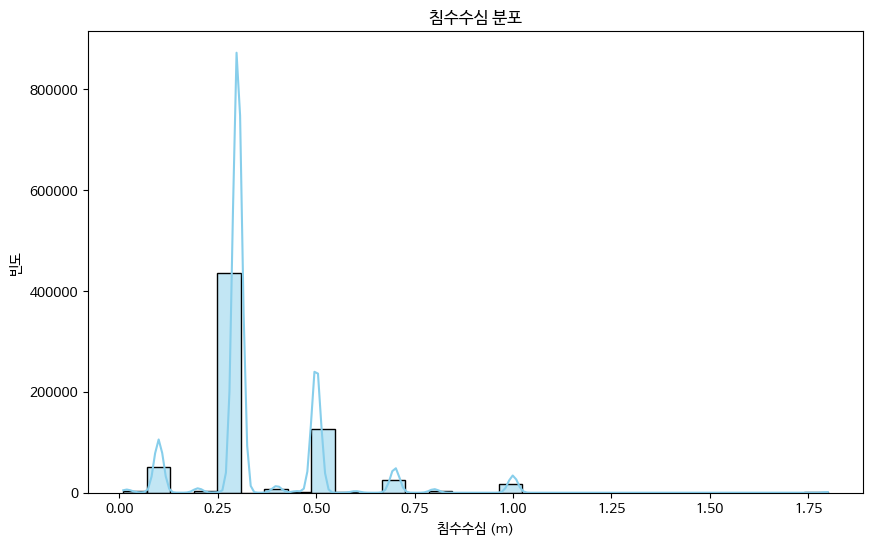

In [ ]:
# 히스토그램과 커널 밀도 추정
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['침수수심'], kde=True, bins=30, color='skyblue')
plt.xlabel('침수수심 (m)')
plt.ylabel('빈도')
plt.title('침수수심 분포')
plt.show()

In [ ]:
merged_df.columns

Index(['자치구', '침수수심', '침수원인', '침수평균해발고도', '침수면적', '침수시작날짜', '침수종료날짜', '침수시작시간',
       '침수종료시간', '침수내용', '주소', '행정코드', '지오메트리', '침수연도', '침수 발생여부', '법정동명_x',
       '지형높이코드', '지형높이', '하천_거리', '행정동_총_면적(km)', '행정동_하천면적(km)', '하천면적비율',
       '법정동명_y', '건물면적_분포구간', '건물면적_구간별_분포수', '구간별_30년_이상_건물_수', '구간별_지하_건물_수',
       '구간별_평균_높이(m)', '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수',
       '일반녹지_면적', '기타녹지_개소수', '기타녹지_면적', '녹지율', '구전체면적', '불투수면적', '불투수면적 비율',
       '날짜', '강수량(mm)', '3시간누적강수량', '6시간누적강수량', '9시간누적강수량', '12시간누적강수량',
       '24시간누적강수량', '36시간누적강수량', '48시간누적강수량', '강수량(mm)_구간', '3시간누적강수량_구간',
       '6시간누적강수량_구간', '9시간누적강수량_구간', '12시간누적강수량_구간', '24시간누적강수량_구간',
       '36시간누적강수량_구간', '48시간누적강수량_구간', '수심구간'],
      dtype='object')

OLS Model (Top 10 Features): MSE = 0.02, R^2 = 0.24
Random Forest Model (Top 10 Features): MSE = 0.00, R^2 = 0.84
Decision Tree Model (Top 10 Features): MSE = 0.00, R^2 = 0.84
XGBoost Model (Top 10 Features): MSE = 0.00, R^2 = 0.86


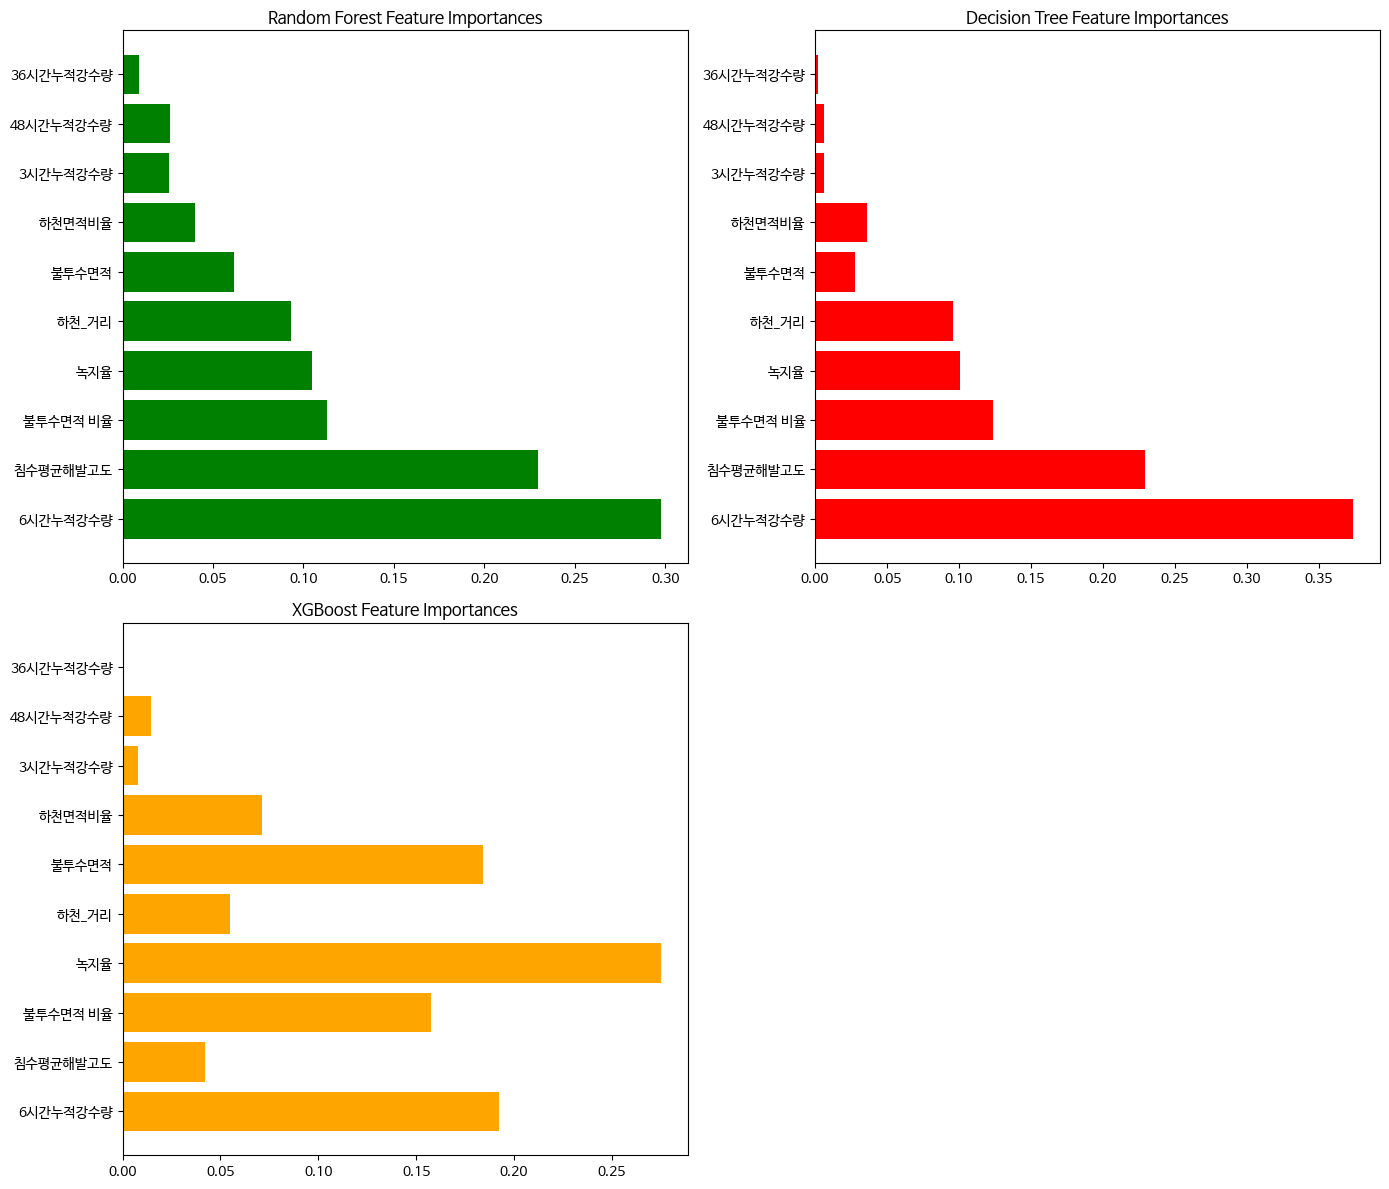

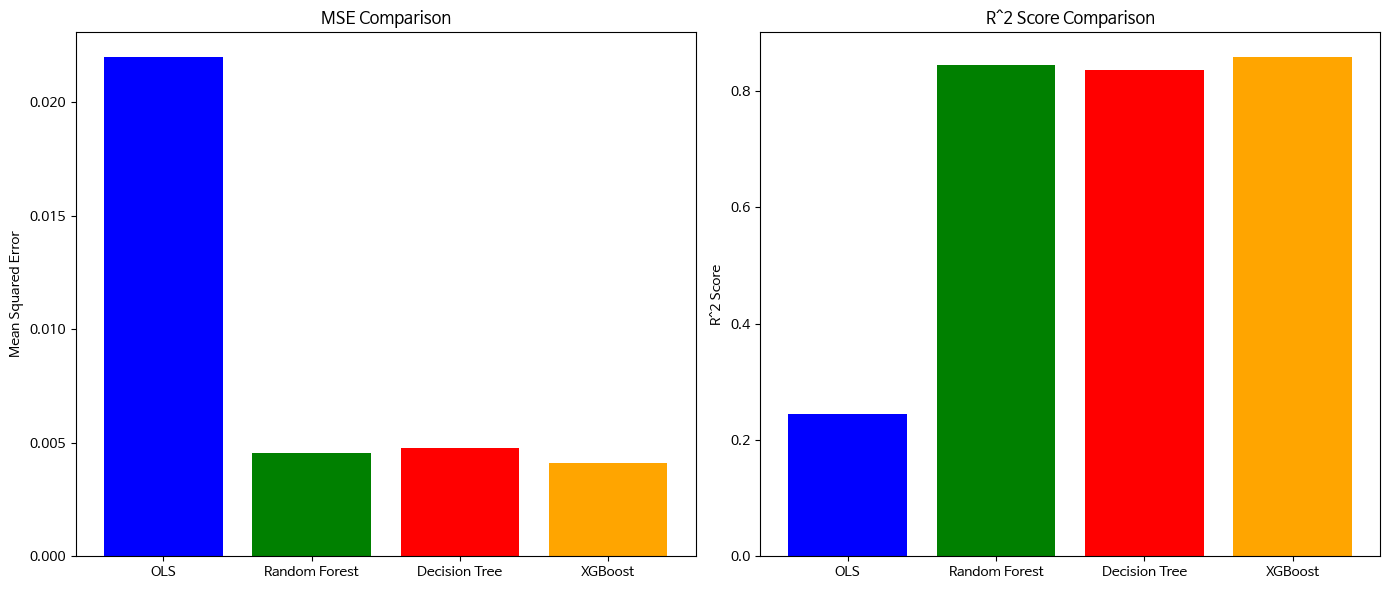

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 불러오기 및 전처리
# merged_df는 이미 준비된 데이터프레임이라고 가정합니다.

# 독립 변수와 종속 변수 설정
X = merged_df[['침수평균해발고도', '하천_거리', '하천면적비율',
               '건물면적_구간별_분포수',
               '구간별_30년_이상_건물_수', '구간별_지하_건물_수', '구간별_평균_높이(m)',
               '녹지율', '불투수면적', '불투수면적 비율', '3시간누적강수량', '6시간누적강수량', '9시간누적강수량',
               '12시간누적강수량', '24시간누적강수량', '36시간누적강수량', '48시간누적강수량']]
y = merged_df['침수수심']

# 데이터 타입 최적화 (float32로 변환)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype('float32')
y = y.fillna(0).astype('float32')

# 상수항 추가
X = sm.add_constant(X)

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습 후 특성 중요도 계산
rf_model = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10)
rf_model.fit(X_train, y_train)

# 특성 중요도 상위 10개 변수 선택
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 상위 10개 변수 추출
top_10_features = importance_df['Feature'].head(10)
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# 회귀 분석 (OLS) - Top 10 Features
model_ols_top10 = sm.OLS(y_train, X_train_top10).fit()
y_pred_ols_top10 = model_ols_top10.predict(X_test_top10)
mse_ols_top10 = mean_squared_error(y_test, y_pred_ols_top10)
r2_ols_top10 = r2_score(y_test, y_pred_ols_top10)

# 랜덤 포레스트 모델 (Top 10 Features)
rf_model_top10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model_top10.fit(X_train_top10, y_train)
y_pred_rf_top10 = rf_model_top10.predict(X_test_top10)
mse_rf_top10 = mean_squared_error(y_test, y_pred_rf_top10)
r2_rf_top10 = r2_score(y_test, y_pred_rf_top10)
rf_importances_top10 = rf_model_top10.feature_importances_

# 의사결정 나무 모델 (Top 10 Features)
dt_model_top10 = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model_top10.fit(X_train_top10, y_train)
y_pred_dt_top10 = dt_model_top10.predict(X_test_top10)
mse_dt_top10 = mean_squared_error(y_test, y_pred_dt_top10)
r2_dt_top10 = r2_score(y_test, y_pred_dt_top10)
dt_importances_top10 = dt_model_top10.feature_importances_

# XGBoost 모델 (Top 10 Features)
xgb_model_top10 = xgb.XGBRegressor(random_state=42, n_estimators=100, max_depth=10)
xgb_model_top10.fit(X_train_top10, y_train)
y_pred_xgb_top10 = xgb_model_top10.predict(X_test_top10)
mse_xgb_top10 = mean_squared_error(y_test, y_pred_xgb_top10)
r2_xgb_top10 = r2_score(y_test, y_pred_xgb_top10)
xgb_importances_top10 = xgb_model_top10.feature_importances_

# 모델 성능 결과 출력
print(f"OLS Model (Top 10 Features): MSE = {mse_ols_top10:.2f}, R^2 = {r2_ols_top10:.2f}")
print(f"Random Forest Model (Top 10 Features): MSE = {mse_rf_top10:.2f}, R^2 = {r2_rf_top10:.2f}")
print(f"Decision Tree Model (Top 10 Features): MSE = {mse_dt_top10:.2f}, R^2 = {r2_dt_top10:.2f}")
print(f"XGBoost Model (Top 10 Features): MSE = {mse_xgb_top10:.2f}, R^2 = {r2_xgb_top10:.2f}")

# 모델별 특성 중요도 시각화
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.barh(top_10_features, rf_importances_top10, color='green')
plt.title('Random Forest Feature Importances')

plt.subplot(2, 2, 2)
plt.barh(top_10_features, dt_importances_top10, color='red')
plt.title('Decision Tree Feature Importances')

plt.subplot(2, 2, 3)
plt.barh(top_10_features, xgb_importances_top10, color='orange')
plt.title('XGBoost Feature Importances')

plt.tight_layout()
plt.show()

# 성능 비교 시각화
models = ['OLS', 'Random Forest', 'Decision Tree', 'XGBoost']
mse_scores = [mse_ols_top10, mse_rf_top10, mse_dt_top10, mse_xgb_top10]
r2_scores = [r2_ols_top10, r2_rf_top10, r2_dt_top10, r2_xgb_top10]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['blue', 'green', 'red', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'orange'])
plt.title('R^2 Score Comparison')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()


## 후진제거법

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd

# 독립 변수와 종속 변수 설정
X = merged_df[['침수면적','침수평균해발고도', '하천_거리', '하천면적비율',
               '건물면적_분포구간', '건물면적_구간별_분포수',
               '구간별_30년_이상_건물_수', '구간별_지하_건물_수', '구간별_평균_높이(m)',
               '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수',
               '일반녹지_면적', '기타녹지_개소수', '기타녹지_면적', '녹지율',
               '구전체면적', '불투수면적', '불투수면적 비율','3시간누적강수량',
               '6시간누적강수량', '9시간누적강수량', '12시간누적강수량',
               '24시간누적강수량', '36시간누적강수량', '48시간누적강수량']]
y = merged_df['침수수심']

# 숫자형으로 변환 가능한 열을 변환
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

# 결측값을 처리 (필요에 따라)
X = X.fillna(0)
y = y.fillna(0)

# 상수항 추가
X = sm.add_constant(X)

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 후진제거법을 사용하여 최적의 회귀 모델 찾기
def backward_elimination(X, y, significance_level=0.05):
    removed_features = []
    while True:
        model = sm.OLS(y, X).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Removing {excluded_feature} with p-value {max_p_value}")
            removed_features.append(excluded_feature)
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return model, removed_features

# 최적의 모델을 찾기 위한 후진제거법 실행
optimal_model, removed_features = backward_elimination(X_train, y_train)

# 최적 모델 평가
optimal_model_summary = optimal_model.summary()
print(optimal_model_summary)

# 최적 모델로 테스트 데이터셋에 대한 예측
y_pred = optimal_model.predict(X_test)

# 제거된 변수와 최종 모델에 남은 변수 출력
final_features = X_train.columns
print("\n제거된 변수들:", removed_features)
print("\n최종 모델에 사용된 변수들:", final_features)


                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                 2.116e+04
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:42:00   Log-Likelihood:             3.8136e+05
No. Observations:              541606   AIC:                        -7.627e+05
Df Residuals:                  541578   BIC:                        -7.624e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6113      0.017     

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# 데이터 샘플링 (10% 샘플링)
sampled_df = merged_df.sample(frac=0.1, random_state=42)

# 독립 변수와 종속 변수 설정
X_sampled = sampled_df[['침수면적','침수평균해발고도', '하천_거리', '하천면적비율',
                        '건물면적_분포구간', '건물면적_구간별_분포수',
                        '구간별_30년_이상_건물_수', '구간별_지하_건물_수', '구간별_평균_높이(m)',
                        '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수',
                        '일반녹지_면적', '기타녹지_개소수', '기타녹지_면적', '녹지율',
                        '구전체면적', '불투수면적', '불투수면적 비율','3시간누적강수량',
                        '6시간누적강수량', '9시간누적강수량', '12시간누적강수량',
                        '24시간누적강수량', '36시간누적강수량', '48시간누적강수량']]
y_sampled = sampled_df['침수수심']

# 숫자형으로 변환 가능한 열을 모두 숫자형으로 변환
for column in X_sampled.columns:
    X_sampled[column] = pd.to_numeric(X_sampled[column], errors='coerce')

# 결측값 처리
X_sampled = X_sampled.fillna(0)
y_sampled = pd.to_numeric(y_sampled, errors='coerce').fillna(0)


In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    initial_features = X.columns
    while True:
        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        p_values = model.pvalues[1:]  # p-value of features, excluding the constant
        max_p_value = p_values.max()

        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            X = X.drop(columns=[excluded_feature])
            print(f"Excluding feature: {excluded_feature}")
        else:
            break

    return model

# 데이터 분할
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# 후진제거법을 사용하여 최적의 회귀 모델 찾기
optimal_model_s = backward_elimination(X_train_s, y_train_s)

# 모델 요약
print(optimal_model_s.summary())


                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     2080.
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:31:50   Log-Likelihood:                 37690.
No. Observations:               54160   AIC:                        -7.532e+04
Df Residuals:                   54132   BIC:                        -7.507e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4870      0.051     

In [ ]:
from sklearn.linear_model import LassoCV

# 작은 알파 값 범위로 설정
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# 교차 검증을 사용한 라쏘 모델 (최적 알파 찾기)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)

# 모델 학습
lasso_cv.fit(X_train_s, y_train_s)

# 최적 알파 값 출력
optimal_alpha = lasso_cv.alpha_
print(f"최적 알파 값: {optimal_alpha}")

# 최적 알파 값을 사용한 라쏘 회귀 모델
lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train_s, y_train_s)

# 라쏘 회귀 계수 출력
lasso_coefficients_optimal = pd.Series(lasso_optimal.coef_, index=X_train_s.columns)
print(lasso_coefficients_optimal)

# 모델 성능 평가
train_score = lasso_optimal.score(X_train_s, y_train_s)
test_score = lasso_optimal.score(X_test_s, y_test_s)
print(f"훈련 데이터 R^2: {train_score}")
print(f"테스트 데이터 R^2: {test_score}")


최적 알파 값: 0.0001
침수면적               0.00000196
침수평균해발고도          -0.00047800
하천_거리             -0.00001113
하천면적비율            -0.18923779
건물면적_분포구간          0.00000000
건물면적_구간별_분포수      -0.00061186
구간별_30년_이상_건물_수   -0.00056969
구간별_지하_건물_수        0.00104469
구간별_평균_높이(m)      -0.00017594
총개소수              -0.00037187
총면적               -0.00000027
시설녹지_개소수           0.00260088
시설녹지_면적            0.00000082
일반녹지_개소수           0.00071090
일반녹지_면적            0.00000108
기타녹지_개소수           0.00035102
기타녹지_면적            0.00000107
녹지율               -0.01165720
구전체면적              0.00035067
불투수면적             -0.00085024
불투수면적 비율           0.01488818
3시간누적강수량          -0.00914281
6시간누적강수량           0.00523038
9시간누적강수량           0.00793326
12시간누적강수량         -0.00777695
24시간누적강수량          0.00180701
36시간누적강수량          0.00161720
48시간누적강수량         -0.00178606
dtype: float64
훈련 데이터 R^2: 0.5074585470919399
테스트 데이터 R^2: 0.5003540188103608


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd


# 독립 변수와 종속 변수 설정
X = merged_df[['침수면적','침수평균해발고도', '하천_거리', '하천면적비율',
               '건물면적_분포구간',	'건물면적_구간별_분포수',
                '구간별_30년_이상_건물_수',	'구간별_지하_건물_수',	'구간별_평균_높이(m)',
               '총개소수',	'총면적',	'시설녹지_개소수',	'시설녹지_면적',	'일반녹지_개소수',	'일반녹지_면적',	'기타녹지_개소수',	'기타녹지_면적',	'녹지율',
               '구전체면적',	'불투수면적',	'불투수면적 비율','3시간누적강수량', '6시간누적강수량', '9시간누적강수량', '12시간누적강수량',
                '24시간누적강수량', '36시간누적강수량', '48시간누적강수량']]
y = merged_df['침수수심']

# 숫자형으로 변환 가능한 열을 변환
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

# 결측값을 처리 (필요에 따라)
X = X.fillna(0)
y = y.fillna(0)

# 상수항 추가
X = sm.add_constant(X)

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 평가
y_pred = model.predict(X_test)
model_summary = model.summary()

print(model_summary)


KeyError: "['침수면적', '침수평균해발고도', '건물면적_분포구간', '구간별_평균_높이(m)', '총개소수', '구전체면적'] not in index"

In [ ]:
#!pip install xgboost scikit-learn

### 데이터 준비 및 모델링

### 랜덤포레스트 특성 중요도 시각화

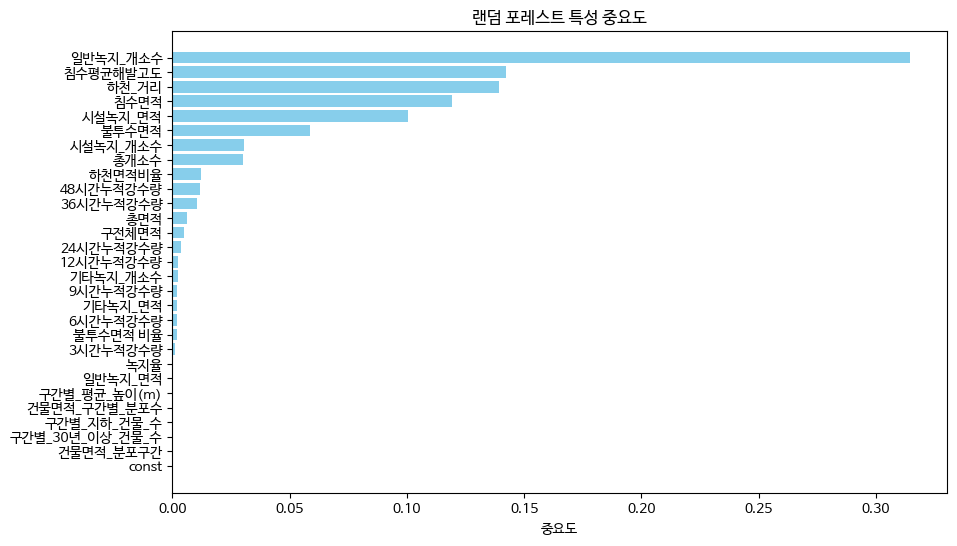

In [ ]:
# 랜덤 포레스트 모델 학습 후 특성 중요도 계산 및 시각화
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 특성 중요도 시각화
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('중요도')
plt.title('랜덤 포레스트 특성 중요도')
plt.gca().invert_yaxis()
plt.show()


### 의사결정나무 특성 중요도 시각화

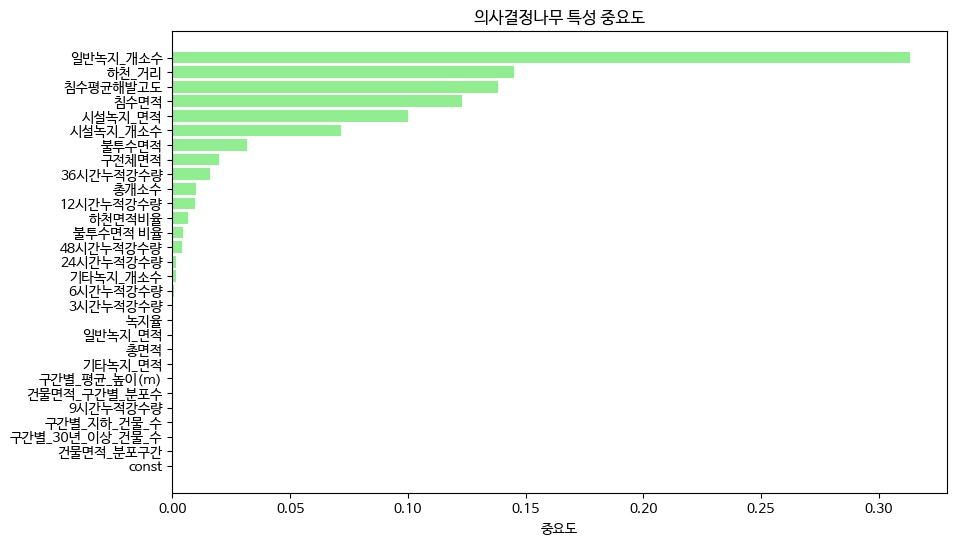

In [ ]:
# 의사결정나무 모델 학습 후 특성 중요도 계산 및 시각화
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 특성 중요도 시각화
feature_importance = dt_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('중요도')
plt.title('의사결정나무 특성 중요도')
plt.gca().invert_yaxis()
plt.show()


### XGBoost 특성 중요도 시각화

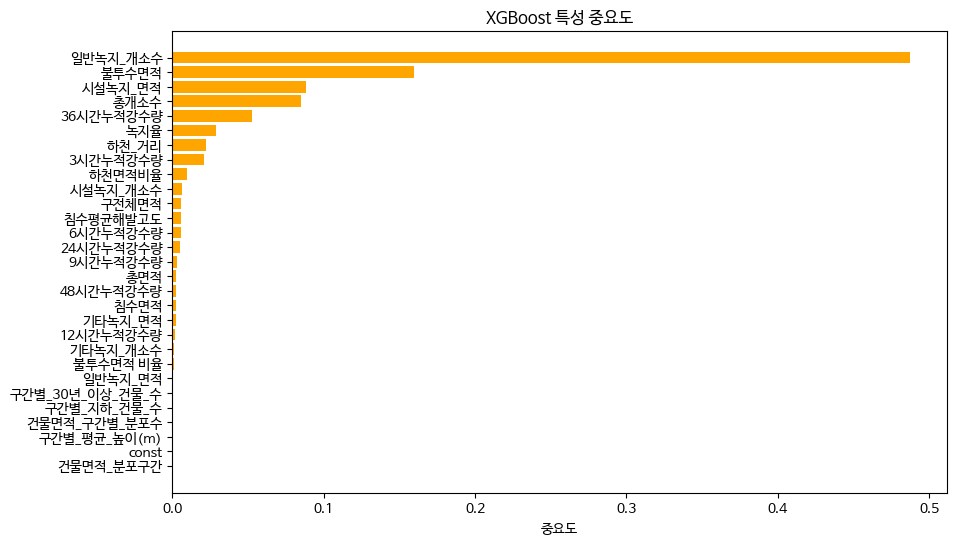

In [ ]:
# XGBoost 모델 학습 후 특성 중요도 계산 및 시각화
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# 특성 중요도 시각화
feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('중요도')
plt.title('XGBoost 특성 중요도')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# 주성분 분석 수행
pca = PCA(n_components=2)  # 5개의 주성분을 추출
X_pca = pca.fit_transform(X)


OLS Model
Mean Squared Error: 0.0299
R^2 Score: -0.0245
------------------------------
Random Forest Model
Mean Squared Error: 0.0050
R^2 Score: 0.8277
------------------------------
Decision Tree Model
Mean Squared Error: 0.0053
R^2 Score: 0.8189
------------------------------
XGBoost Model
Mean Squared Error: 0.0005
R^2 Score: 0.9829
------------------------------


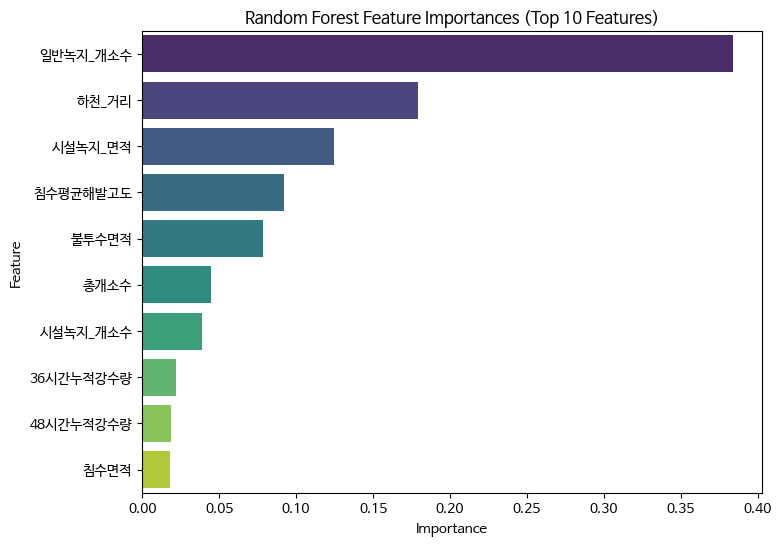

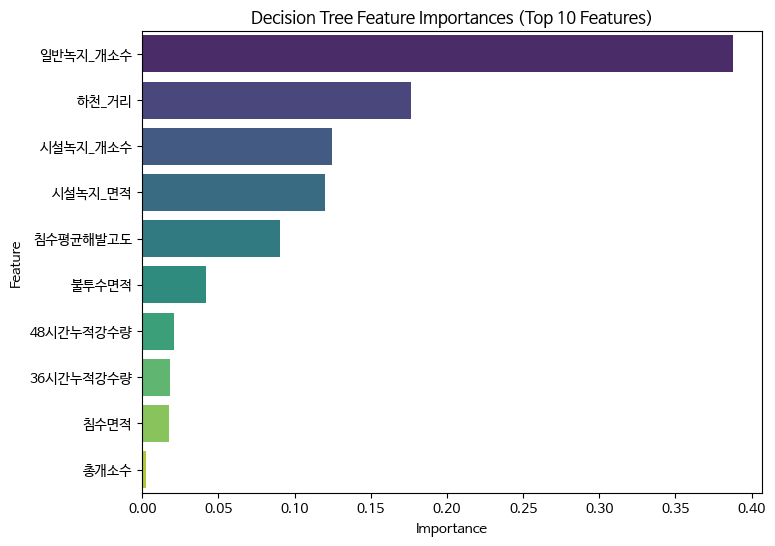

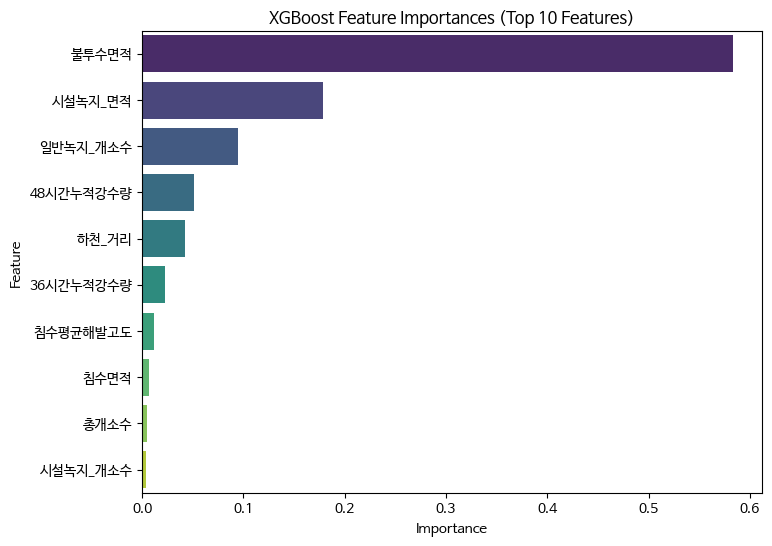

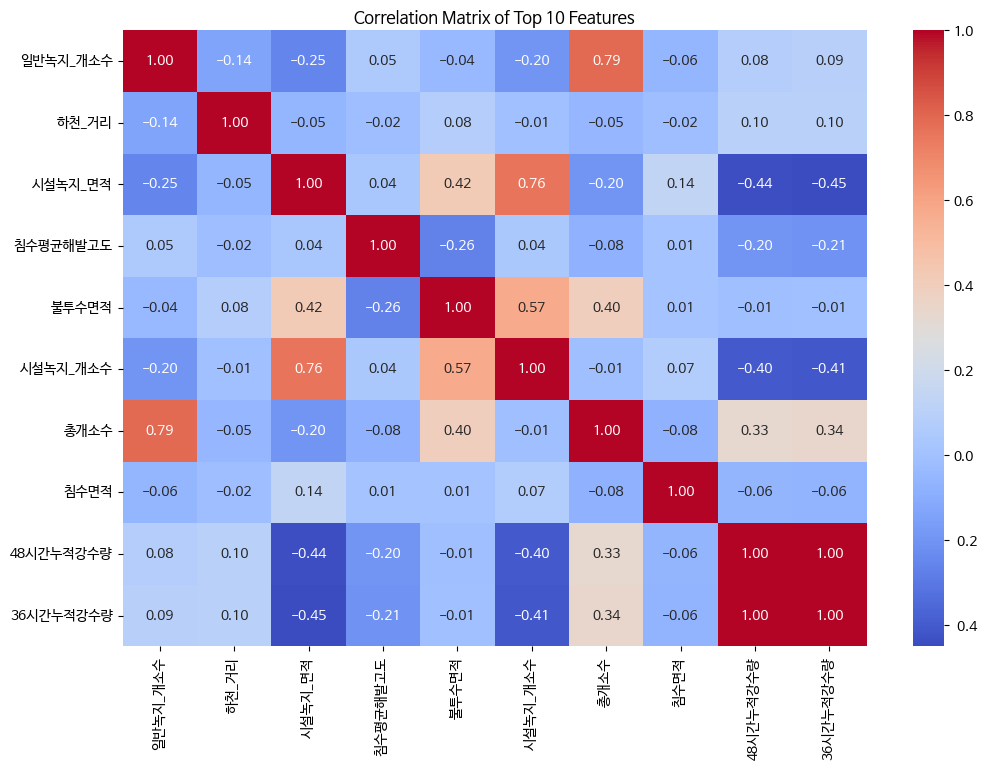

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 불러오기 및 전처리
# merged_df는 이미 준비된 데이터프레임이라고 가정합니다.

# 독립 변수와 종속 변수 설정
X = merged_df[['침수면적', '침수평균해발고도', '하천_거리', '하천면적비율',
               '건물면적_분포구간', '건물면적_구간별_분포수',
               '구간별_30년_이상_건물_수', '구간별_지하_건물_수', '구간별_평균_높이(m)',
               '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수', '일반녹지_면적',
               '기타녹지_개소수', '기타녹지_면적', '녹지율', '구전체면적', '불투수면적',
               '불투수면적 비율', '3시간누적강수량', '6시간누적강수량', '9시간누적강수량',
               '12시간누적강수량', '24시간누적강수량', '36시간누적강수량', '48시간누적강수량']]
y = merged_df['침수수심']

# 데이터 타입 최적화 (float32로 변환)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype('float32')
y = y.fillna(0).astype('float32')

# 상수항 추가
X = sm.add_constant(X)

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습 후 특성 중요도 계산
rf_model = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10)
rf_model.fit(X_train, y_train)

# 특성 중요도 상위 10개 변수 선택
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 상위 10개 변수 추출
top_10_features = importance_df['Feature'].head(10)
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# 결과 저장을 위한 딕셔너리
results = {}

# 회귀 분석 (OLS) - Top 10 Features
model_name = 'OLS'
model_ols_top10 = sm.OLS(y_train, X_train_top10).fit()
y_pred_ols_top10 = model_ols_top10.predict(X_test_top10)
mse_ols_top10 = mean_squared_error(y_test, y_pred_ols_top10)
r2_ols_top10 = r2_score(y_test, y_pred_ols_top10)

# 결과 저장 및 출력
results[model_name] = {"MSE": mse_ols_top10, "R^2": r2_ols_top10}
print(f"{model_name} Model")
print(f"Mean Squared Error: {mse_ols_top10:.4f}")
print(f"R^2 Score: {r2_ols_top10:.4f}")
print("-" * 30)

# 랜덤 포레스트 모델 (Top 10 Features)
model_name = 'Random Forest'
rf_model_top10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model_top10.fit(X_train_top10, y_train)
y_pred_rf_top10 = rf_model_top10.predict(X_test_top10)
mse_rf_top10 = mean_squared_error(y_test, y_pred_rf_top10)
r2_rf_top10 = r2_score(y_test, y_pred_rf_top10)
rf_importances_top10 = rf_model_top10.feature_importances_

# 결과 저장 및 출력
results[model_name] = {"MSE": mse_rf_top10, "R^2": r2_rf_top10}
print(f"{model_name} Model")
print(f"Mean Squared Error: {mse_rf_top10:.4f}")
print(f"R^2 Score: {r2_rf_top10:.4f}")
print("-" * 30)

# 의사결정 나무 모델 (Top 10 Features)
model_name = 'Decision Tree'
dt_model_top10 = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model_top10.fit(X_train_top10, y_train)
y_pred_dt_top10 = dt_model_top10.predict(X_test_top10)
mse_dt_top10 = mean_squared_error(y_test, y_pred_dt_top10)
r2_dt_top10 = r2_score(y_test, y_pred_dt_top10)
dt_importances_top10 = dt_model_top10.feature_importances_

# 결과 저장 및 출력
results[model_name] = {"MSE": mse_dt_top10, "R^2": r2_dt_top10}
print(f"{model_name} Model")
print(f"Mean Squared Error: {mse_dt_top10:.4f}")
print(f"R^2 Score: {r2_dt_top10:.4f}")
print("-" * 30)

# XGBoost 모델 (Top 10 Features)
model_name = 'XGBoost'
xgb_model_top10 = xgb.XGBRegressor(random_state=42, n_estimators=100, max_depth=10)
xgb_model_top10.fit(X_train_top10, y_train)
y_pred_xgb_top10 = xgb_model_top10.predict(X_test_top10)
mse_xgb_top10 = mean_squared_error(y_test, y_pred_xgb_top10)
r2_xgb_top10 = r2_score(y_test, y_pred_xgb_top10)
xgb_importances_top10 = xgb_model_top10.feature_importances_

# 결과 저장 및 출력
results[model_name] = {"MSE": mse_xgb_top10, "R^2": r2_xgb_top10}
print(f"{model_name} Model")
print(f"Mean Squared Error: {mse_xgb_top10:.4f}")
print(f"R^2 Score: {r2_xgb_top10:.4f}")
print("-" * 30)

# 모델별 특성 중요도 시각화
model_importances = {
    "Random Forest": rf_importances_top10,
    "Decision Tree": dt_importances_top10,
    "XGBoost": xgb_importances_top10
}

for model_name, importances in model_importances.items():
    importance_df = pd.DataFrame({
        'Feature': top_10_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'{model_name} Feature Importances (Top 10 Features)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# 변수 간 상관관계 분석
plt.figure(figsize=(12, 8))
corr_matrix = X_train_top10.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features')
plt.show()


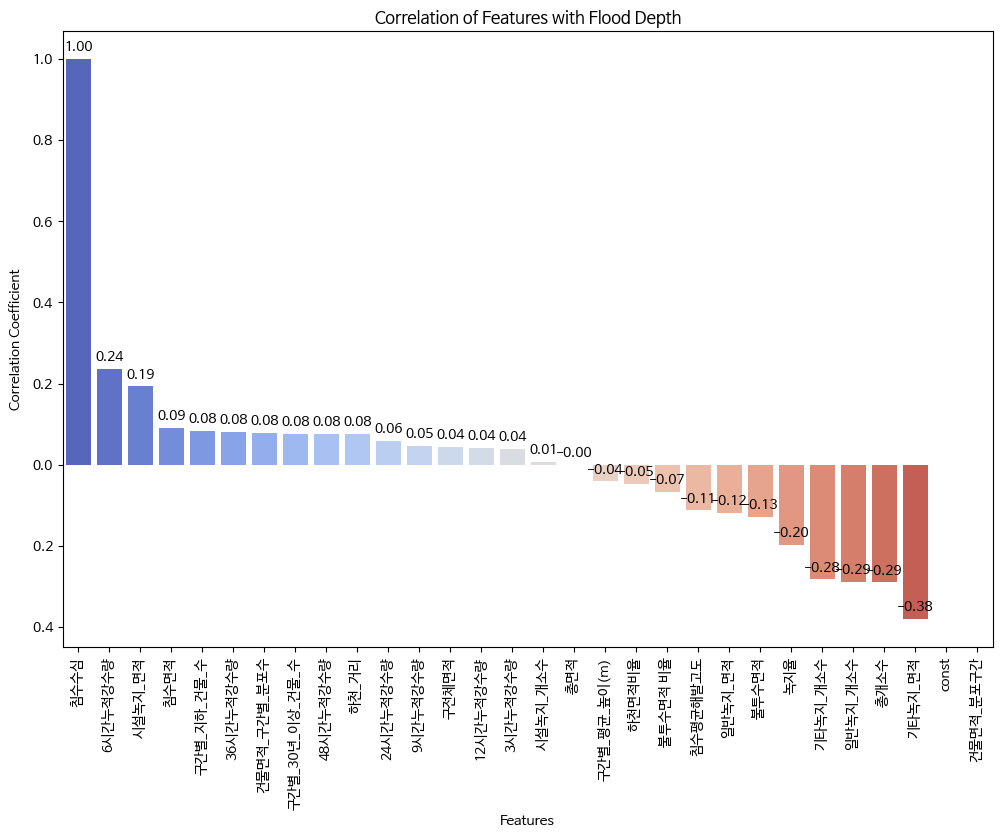

Correlation with Flood Depth:
침수수심               1.00000000
6시간누적강수량           0.23551627
시설녹지_면적            0.19276891
침수면적               0.09017067
구간별_지하_건물_수        0.08423035
36시간누적강수량          0.08001199
건물면적_구간별_분포수       0.07926270
구간별_30년_이상_건물_수    0.07677625
48시간누적강수량          0.07606516
하천_거리              0.07517417
24시간누적강수량          0.05824633
9시간누적강수량           0.04558437
구전체면적              0.04363983
12시간누적강수량          0.04130803
3시간누적강수량           0.03874174
시설녹지_개소수           0.00688413
총면적               -0.00019485
구간별_평균_높이(m)      -0.04143021
하천면적비율            -0.04812286
불투수면적 비율          -0.06814613
침수평균해발고도          -0.11266452
일반녹지_면적           -0.11835564
불투수면적             -0.12947260
녹지율               -0.19771492
기타녹지_개소수          -0.28287412
일반녹지_개소수          -0.28834853
총개소수              -0.29018325
기타녹지_면적           -0.38076089
const                     NaN
건물면적_분포구간                 NaN
Name: 침수수심, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 침수수심과 독립 변수를 합친 데이터프레임 생성
X_with_target = X.copy()
X_with_target['침수수심'] = y

# 침수수심과 독립 변수 간의 상관계수 계산
correlation_with_target = X_with_target.corr()['침수수심'].sort_values(ascending=False)

# 상관계수 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Flood Depth')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)

# 상관계수 수치도 함께 출력
for i, v in enumerate(correlation_with_target.values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# 상관계수 값 출력
print("Correlation with Flood Depth:")
print(correlation_with_target)


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_train)

# 주성분 로딩 계산
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_components_to_show = 5  # 상위 5개의 주성분을 보여줌

# 주성분 로딩을 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings[:, :num_components_to_show],
                           columns=[f'PC{i+1}' for i in range(num_components_to_show)],
                           index=X.columns)

# 각 주성분(PC)별 상위 5개의 주요 변수 출력
top_features_per_pc = {}
for i in range(num_components_to_show):
    pc_name = f'PC{i+1}'
    top_features = loadings_df[pc_name].abs().sort_values(ascending=False).head(5)
    top_features_per_pc[pc_name] = top_features

# 결과 출력
for pc, features in top_features_per_pc.items():
    print(f"\n{pc}의 주요 변수들:")
    print(features)

# 전체 로딩 값을 DataFrame으로 출력하여 확인
print("\n전체 PCA 로드 행렬:")
print(loadings_df)



PC1의 주요 변수들:
하천_거리       1054.95708420
불투수면적         19.53860618
9시간누적강수량       7.81775536
12시간누적강수량      7.70238524
24시간누적강수량      7.09028188
Name: PC1, dtype: float64

PC2의 주요 변수들:
불투수면적          230.86908455
건물면적_구간별_분포수     5.83815803
6시간누적강수량         5.79355799
침수평균해발고도         5.62297494
하천_거리            4.31103736
Name: PC2, dtype: float64

PC3의 주요 변수들:
36시간누적강수량   48.04725134
48시간누적강수량   47.30958316
24시간누적강수량   45.77312355
12시간누적강수량   44.97390428
9시간누적강수량    44.54716857
Name: PC3, dtype: float64

PC4의 주요 변수들:
건물면적_구간별_분포수      37.53806932
구간별_지하_건물_수       31.15520857
구간별_30년_이상_건물_수   16.56286763
48시간누적강수량          6.38379940
36시간누적강수량          6.23898322
Name: PC4, dtype: float64

PC5의 주요 변수들:
48시간누적강수량   15.35206742
36시간누적강수량   14.94353647
9시간누적강수량    11.91747442
12시간누적강수량   11.23793486
6시간누적강수량     7.19317579
Name: PC5, dtype: float64

전체 PCA 로드 행렬:
                          PC1          PC2          PC3         PC4  \
const             -0.00000000   0.00000000   0.0000000

## 지도시각화

In [ ]:
# !pip install folium
# !pip install shapely
# !pip install geopy
# !pip install pyproj
# !pip install geopandas

In [ ]:
import folium
from shapely import wkt
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from pyproj import Transformer
import geopandas as gpd

In [ ]:
# 자치구 기준 병합 과정 최적화 예제

# 1. 건물 데이터 병합
merged_df = pd.merge(df5, df, on='자치구', how='left')

# 2. 녹지 데이터 병합
merged_df = pd.merge(merged_df, df2, on='자치구', how='left')

# 3. 불투수율 데이터 병합
merged_df = pd.merge(merged_df, df3, on='자치구', how='left')

# 4. 빗물펌프거리 데이터 병합 (법정동명에서 자치구 파생변수 설정 후 병합)
#df4['법정동명'] = df4['법정동명'].str.strip()  # 혹시 모를 공백 제거
#merged_df = pd.merge(merged_df, df4[['법정동명', '자치구', '빗물펌프거리']], on='자치구', how='left')
#print("빗물펌프거리 데이터 병합 후:\n", merged_df.info())

# 5. 행정동 면적당 암거, 측구 데이터 병합
#merged_df = pd.merge(merged_df, df6, on='자치구', how='left')

# 6.

# 7. 강수량 데이터 병합
#새 컬럼 필요...(날짜데이터 합친 년월일+시 데이터)
merged_df['날짜'] = pd.to_datetime(merged_df['침수시작날짜'].astype(str) + merged_df['침수시작시간'].astype(str).apply(lambda x: x.zfill(2)),
                             format = '%Y%m%d%H')
merged_df = pd.merge(merged_df, df7, how='left', left_on=['날짜', '자치구'], right_on=['날짜', '관측소명'])
merged_df = merged_df.drop(columns=['관측소명','관측소번호'])

# 필요 시 추가적인 결측값 처리 및 중복 열 제거
merged_df.fillna(0, inplace=True)  # 필요 시 기본값으로 NaN 처리
merged_df.head(1)

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,불투수면적 비율,날짜,강수량(mm),3시간누적강수량,6시간누적강수량,9시간누적강수량,12시간누적강수량,24시간누적강수량,36시간누적강수량,48시간누적강수량
0,강북구,0.02000000,2022년 8.8 ~17. 호우,114.53000000,3876.00000000,20220808,20220808,18,23,내수침수,...,36.15000000,2022-08-08 18:00:00,29.00000000,32.00000000,48.50000000,52.00000000,57.50000000,58.00000000,58.00000000,58.00000000


In [ ]:
# 상위 20개 행정동 (자치구) 데이터만 필터링
# '강서구','양천구','마포구','구로구','영등포구','동작구','금천구','관악구','서초구','강남구','광진구','강동구'
#merged_df = merged_df[merged_df['자치구'].isin(['강서구','양천구','마포구','구로구','영등포구','동작구','금천구','관악구','서초구','강남구','광진구','강동구'])]

### 전체코드

In [ ]:
'''
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from shapely import wkt

# 데이터 로딩 및 준비
# 'merged_df'는 이미 데이터가 준비된 상태라고 가정합니다.

# 필요한 열만 선택하여 데이터프레임 필터링
required_columns = [
    '지오메트리', '침수평균해발고도', '하천_거리', '하천면적비율',
    '건물면적_구간별_분포수', '구간별_30년_이상_건물_수', '구간별_지하_건물_수', '구간별_평균_높이(m)',
    '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수', '일반녹지_면적',
    '기타녹지_개소수', '기타녹지_면적', '녹지율', '구전체면적', '불투수면적', '불투수면적 비율',
    '3시간누적강수량', '6시간누적강수량', '9시간누적강수량', '12시간누적강수량', '24시간누적강수량',
    '36시간누적강수량', '48시간누적강수량', '침수수심'
]
merged_df = merged_df[required_columns]

# 결측치가 있는 행 제거
merged_df = merged_df.dropna()

# 지오메트리 열을 Polygon 객체로 변환하고, GeoDataFrame으로 변환
merged_df['지오메트리'] = merged_df['지오메트리'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(merged_df, geometry='지오메트리')

# CRS 설정 및 변환
if gdf.crs is None:
    gdf.set_crs(epsg=5179, inplace=True, allow_override=True)
else:
    gdf = gdf.to_crs(epsg=5179)
gdf = gdf.to_crs(epsg=4326)

# 위도와 경도 추출
gdf['위도'] = gdf.geometry.centroid.y
gdf['경도'] = gdf.geometry.centroid.x

# 범주형 변수 인코딩 (One-Hot Encoding)
gdf_encoded = pd.get_dummies(gdf.drop(columns=['지오메트리', '위도', '경도']), drop_first=True)

# 예측 대상 변수 설정 (예: '침수수심')
y = gdf_encoded['침수수심']
X = gdf_encoded.drop(columns=['침수수심'])

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA 적용 (훈련 데이터만)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 고유값 및 기여율 계산
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 결과 데이터프레임 생성
results_df = pd.DataFrame({
    '주성분': [f'PC{i+1}' for i in range(len(eigenvalues))],
    '고유값': eigenvalues,
    '기여율': explained_variance_ratio,
    '누적 기여율': cumulative_explained_variance_ratio
})

print(results_df)

# 기여율과 누적 기여율 시각화
plt.figure(figsize=(12, 6))

# 기여율 플롯
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('주성분')
plt.ylabel('기여율')
plt.title('주성분 기여율')

# 누적 기여율 플롯
plt.subplot(1, 2, 2)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('주성분')
plt.ylabel('누적 기여율')
plt.title('주성분 누적 기여율')

plt.tight_layout()
plt.show()

# 주성분 선택 (예: 누적 기여율 85%까지의 주성분 선택)
num_components = np.argmax(cumulative_explained_variance_ratio >= 0.85) + 1
X_train_reduced = X_train_pca[:, :num_components]
X_test_reduced = X_test_pca[:, :num_components]

print(f'선택된 주성분 개수: {num_components}')

# 데이터 샘플링 (훈련 세트의 60% 사용)
X_train_sampled = X_train_reduced[:int(0.6 * X_train_reduced.shape[0]), :]
y_train_sampled = y_train[:int(0.6 * y_train.shape[0])]

# 모델 설정 (기본 파라미터로 설정)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

results = {}

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train_sampled, y_train_sampled)
    y_pred = model.predict(X_test_reduced)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MSE": mse, "R^2": r2}

    print(f"{model_name} Model")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)

# 가장 성능이 좋은 모델 선택
best_model_name = max(results, key=lambda k: results[k]["R^2"])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"MSE: {results[best_model_name]['MSE']:.2f}")
print(f"R^2: {results[best_model_name]['R^2']:.2f}")

# 선택된 모델로 최종 예측 수행
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)

# 예측 결과를 포함한 GeoDataFrame 생성
split_index = int(0.8 * len(gdf))
gdf_test = gdf.iloc[split_index:].copy()
gdf_test['예측수심'] = best_y_pred

# Folium 지도 생성 및 시각화 (필요시)
map_center = [gdf_test['위도'].mean(), gdf_test['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)

# 스타일 함수 정의
def style_function(feature):
    depth = feature['properties'].get('예측수심', 0)
    if depth >= 1.0:
        color = '#ff0000'  # 1m 이상 - 빨간색
    elif depth >= 0.8:
        color = '#ff4500'  # 0.8m - 다크 오렌지색
    elif depth >= 0.6:
        color = '#ffa500'  # 0.6m - 오렌지색
    elif depth >= 0.4:
        color = '#ffd700'  # 0.4m - 금색
    elif depth >= 0.2:
        color = '#ffe4b5'  # 0.2m - 연한 주황색
    else:
        color = '#ffffe0'  # 0m - 연한 노란색
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    }

highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

# GeoDataFrame을 GeoJSON으로 변환
geojson_data = gdf_test.to_json()

# Folium GeoJson 추가
folium.GeoJson(
    geojson_data,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['예측수심'],
        aliases=['예측 침수수심: '],
        localize=True
    )
).add_to(map)

# 지도 저장
map.save("pca_flood_prediction_map.html")

# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)
'''

'\nfrom sklearn.decomposition import PCA\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom xgboost import XGBRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.model_selection import train_test_split\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport folium\nimport geopandas as gpd\nfrom shapely import wkt\n\n# 데이터 로딩 및 준비\n# \'merged_df\'는 이미 데이터가 준비된 상태라고 가정합니다.\n\n# 필요한 열만 선택하여 데이터프레임 필터링\nrequired_columns = [\n    \'지오메트리\', \'침수평균해발고도\', \'하천_거리\', \'하천면적비율\',\n    \'건물면적_구간별_분포수\', \'구간별_30년_이상_건물_수\', \'구간별_지하_건물_수\', \'구간별_평균_높이(m)\',\n    \'총개소수\', \'총면적\', \'시설녹지_개소수\', \'시설녹지_면적\', \'일반녹지_개소수\', \'일반녹지_면적\',\n    \'기타녹지_개소수\', \'기타녹지_면적\', \'녹지율\', \'구전체면적\', \'불투수면적\', \'불투수면적 비율\',\n    \'3시간누적강수량\', \'6시간누적강수량\', \'9시간누적강수량\', \'12시간누적강수량\', \'24시간누적강수량\',\n    \'36시간누적강수량\', \'48시간누적강수량\', \'침수수심\'\n]\nmerged_df = merged_df[required_columns]\n\n# 결측치가 있는 

### 1. 데이터 준비 및 PCA 적용, 모델 훈련 및 평가

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import folium

In [ ]:
# 원래코드

In [ ]:
# 데이터 로딩 및 준비
# 필요한 열만 선택하여 데이터프레임 필터링 (자치구 제외)
required_columns = [
    '지오메트리', '자치구', '침수 발생여부', '하천_거리', '하천면적비율',
    '건물면적_구간별_분포수', '구간별_30년_이상_건물_수', '구간별_지하_건물_수',
    '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수',
    '일반녹지_면적', '기타녹지_개소수', '기타녹지_면적', '녹지율', '불투수면적', '불투수면적 비율',
    '3시간누적강수량', '6시간누적강수량', '9시간누적강수량', '12시간누적강수량',
    '24시간누적강수량', '36시간누적강수량', '48시간누적강수량', '침수수심'
]
merged_df = merged_df[required_columns]

# 결측치가 있는 행 제거
merged_df = merged_df.dropna()

# 지오메트리 열을 Polygon 객체로 변환하고, GeoDataFrame으로 변환
merged_df['지오메트리'] = merged_df['지오메트리'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(merged_df, geometry='지오메트리')

# CRS 설정 및 변환
if gdf.crs is None:
    gdf.set_crs(epsg=5179, inplace=True, allow_override=True)
else:
    gdf = gdf.to_crs(epsg=5179)
gdf = gdf.to_crs(epsg=4326)

# 위도와 경도 추출
gdf['위도'] = gdf.geometry.centroid.y
gdf['경도'] = gdf.geometry.centroid.x

# 자치구 컬럼만 별도로 저장
gdf_with_district = gdf[['자치구']].copy()

# 범주형 변수 인코딩 (One-Hot Encoding) (자치구 제외)
gdf_encoded = pd.get_dummies(gdf.drop(columns=['지오메트리', '위도', '경도', '자치구']), drop_first=True)

# 예측 대상 변수 설정 (예: '침수수심')
y = gdf_encoded['침수수심']
X = gdf_encoded.drop(columns=['침수수심'])

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA 적용
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 주성분 로딩 계산
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_components_to_show = 5  # 상위 5개의 주성분을 보여줌

# 주성분 로딩을 데이터프레임으로 변환
loadings_df = pd.DataFrame(loadings[:, :num_components_to_show],
                           columns=[f'PC{i+1}' for i in range(num_components_to_show)],
                           index=X.columns)

# 각 주성분(PC)별 상위 5개의 주요 변수 출력
top_features_per_pc = {}
for i in range(num_components_to_show):
    pc_name = f'PC{i+1}'
    top_features = loadings_df[pc_name].abs().sort_values(ascending=False).head(5)
    top_features_per_pc[pc_name] = top_features

# 결과 출력
for pc, features in top_features_per_pc.items():
    print(f"\n{pc}의 주요 변수들:")
    print(features)

# 전체 로딩 값을 DataFrame으로 출력하여 확인
print("\n전체 PCA 로드 행렬:")
print(loadings_df)

# PCA 고유 기여율을 백분율로 변환
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_percent = explained_variance_ratio * 100

# 고유 기여율 백분율 출력
print("고유 기여율 (Explained Variance Ratio) in %:")
for i, ratio in enumerate(explained_variance_ratio_percent, 1):
    print(f"PCA{i}: {ratio:.2f}%")

# 주요 주성분을 활용하여 데이터 차원 축소
num_components_to_use = 5  # 필요에 따라 조정
X_train_reduced = X_train_pca[:, :num_components_to_use]
X_test_reduced = X_test_pca[:, :num_components_to_use]

# 데이터 샘플링 (훈련 세트의 60% 사용)
X_train_sampled = X_train_reduced[:int(0.6 * X_train_reduced.shape[0]), :]
y_train_sampled = y_train[:int(0.6 * y_train.shape[0])]

# 모델 설정 (기본 파라미터로 설정)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

results = {}

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train_sampled, y_train_sampled)
    y_pred = model.predict(X_test_reduced)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MSE": mse, "R^2": r2}

    print(f"{model_name} Model")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)

# 가장 성능이 좋은 모델 선택
best_model_name = max(results, key=lambda k: results[k]["R^2"])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"MSE: {results[best_model_name]['MSE']:.2f}")
print(f"R^2: {results[best_model_name]['R^2']:.2f}")

# 선택된 모델로 최종 예측 수행
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)


PC1의 주요 변수들:
24시간누적강수량   0.96529272
12시간누적강수량   0.96012326
9시간누적강수량    0.95748755
3시간누적강수량    0.88542201
36시간누적강수량   0.88419154
Name: PC1, dtype: float64

PC2의 주요 변수들:
총면적        0.82743628
불투수면적      0.76592734
녹지율        0.67211386
일반녹지_면적    0.62351750
시설녹지_개소수   0.56681779
Name: PC2, dtype: float64

PC3의 주요 변수들:
구간별_30년_이상_건물_수   0.80695238
구간별_지하_건물_수       0.77791486
건물면적_구간별_분포수      0.74288840
총면적               0.36147045
불투수면적             0.29089684
Name: PC3, dtype: float64

PC4의 주요 변수들:
기타녹지_면적    0.61141284
일반녹지_개소수   0.56742626
시설녹지_면적    0.42658739
기타녹지_개소수   0.40362677
시설녹지_개소수   0.38598237
Name: PC4, dtype: float64

PC5의 주요 변수들:
하천_거리      0.53723715
침수 발생여부    0.51384897
하천면적비율     0.49718097
불투수면적 비율   0.31800790
시설녹지_면적    0.27039528
Name: PC5, dtype: float64

전체 PCA 로드 행렬:
                        PC1         PC2         PC3         PC4         PC5
침수 발생여부          0.03354874  0.08246117  0.12222035 -0.25246850 -0.51384897
하천_거리           -0.14007917  0.04317983  0.

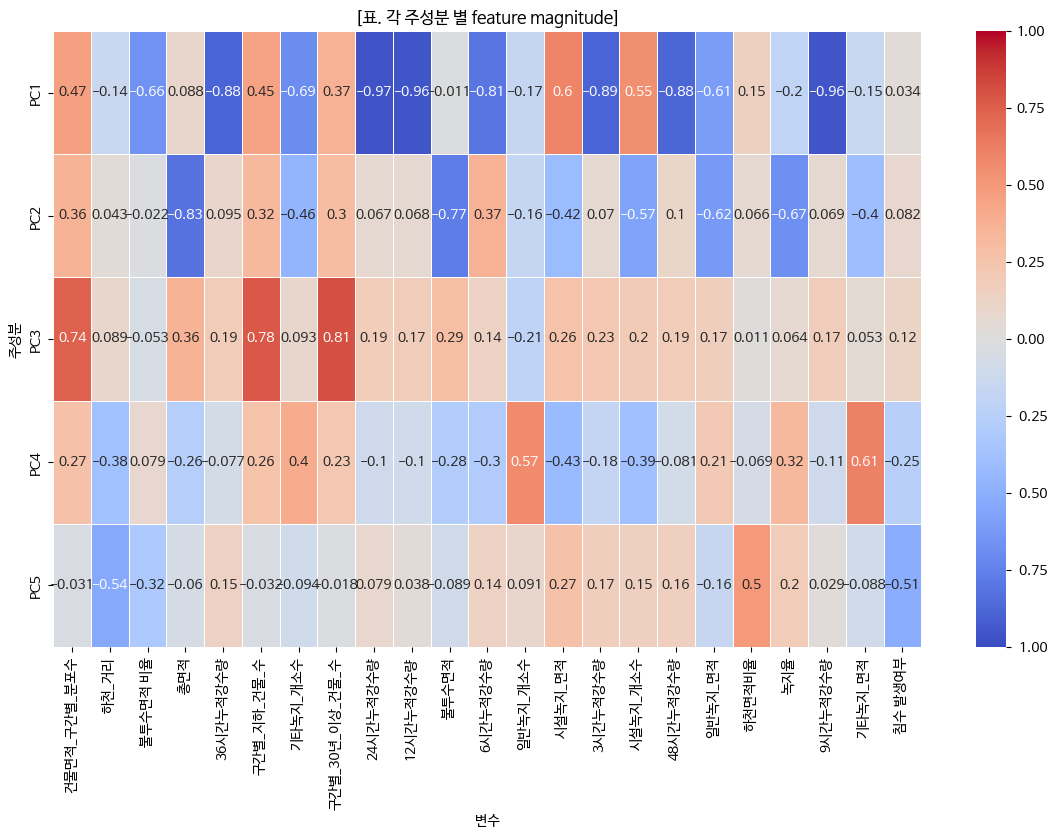

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# PCA 주성분 로딩 계산
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 주성분 개수와 변수 개수 설정
num_components_to_show = 5
num_features_to_show = 10  # 상위 10개 변수로 설정

# 주성분 번호 (상위 num_components_to_show 개)
components = [f'PC{i+1}' for i in range(num_components_to_show)]

# 전체 변수명
feature_names = X.columns

# 각 주성분별 상위 num_features_to_show 변수 선택
top_features_per_pc = {}
for i in range(num_components_to_show):
    pc_name = f'PC{i+1}'
    # 절대값을 계산하여 상위 num_features_to_show 변수 선택
    top_features_indices = np.abs(loadings[:, i]).argsort()[-num_features_to_show:][::-1]
    top_feature_names = feature_names[top_features_indices]
    top_features_per_pc[pc_name] = top_feature_names

# 중복된 변수 제거 후 고유 변수명 선택
unique_features = list(set([item for sublist in top_features_per_pc.values() for item in sublist]))

# 상위 10개 변수의 주성분 로딩 값 선택
selected_features_indices = [feature_names.get_loc(name) for name in unique_features]
selected_loadings = loadings[selected_features_indices, :num_components_to_show]

# DataFrame으로 변환 (행과 열을 바꾸어 y축에 주성분, x축에 변수를 표시)
loading_matrix = pd.DataFrame(selected_loadings.T, columns=[feature_names[i] for i in selected_features_indices], index=components)

# 히트맵 생성
plt.figure(figsize=(14, 8))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, vmin=-1, vmax=1)

# 그래프 제목 및 축 라벨 설정
plt.title('[표. 각 주성분 별 feature magnitude]')
plt.xlabel('변수')
plt.ylabel('주성분')
plt.show()


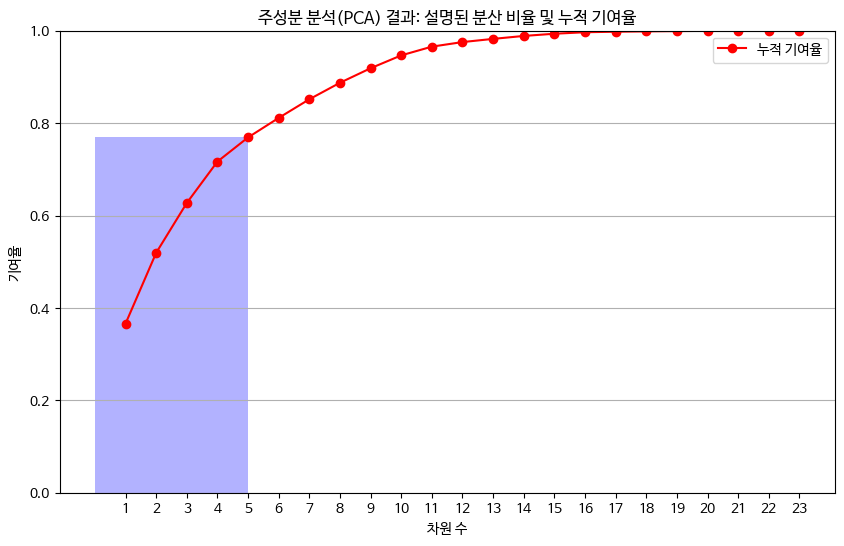

In [ ]:
# 누적 기여율 계산
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 그래프 생성
plt.figure(figsize=(10, 6))

# 누적 기여율 선 그래프
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', color='r', label='누적 기여율')

# 첫 5개 주성분의 누적 기여율을 표시하는 넓은 막대
plt.bar(x=2.5, height=cumulative_explained_variance[4], width=5, alpha=0.3, color='b')

# 라벨 및 그래프 서식 설정
plt.xlabel('차원 수')
plt.ylabel('기여율')
plt.ylim(0, 1.0)
plt.title('주성분 분석(PCA) 결과: 설명된 분산 비율 및 누적 기여율')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, axis='y')
plt.legend()

# 그래프 출력
plt.show()


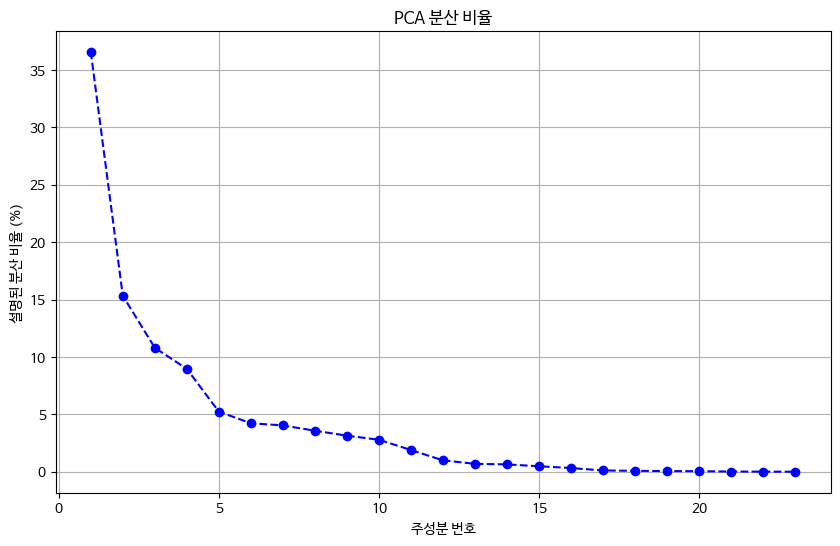

In [ ]:
import matplotlib.pyplot as plt

# PCA 분산 비율 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_percent) + 1), explained_variance_ratio_percent, marker='o', linestyle='--', color='b')
plt.xlabel('주성분 번호')
plt.ylabel('설명된 분산 비율 (%)')
plt.title('PCA 분산 비율')
plt.grid(True)
plt.show()


### 2. PCA1~PCA5 (76.9%)를 각각 시각화하는 Folium 지도 생성

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # OLS 회귀 모델을 위해 필요
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# 자치구별로 나누어 학습 및 테스트 데이터로 샘플링하는 함수
def split_by_district(df, test_ratio=0.2):
    train_df_list = []
    test_df_list = []

    for district in df['자치구'].unique():
        district_df = df[df['자치구'] == district].copy()
        train_df, test_df = train_test_split(district_df, test_size=test_ratio, random_state=42)
        train_df_list.append(train_df)
        test_df_list.append(test_df)

    gdf_train = pd.concat(train_df_list).reset_index(drop=True)
    gdf_test = pd.concat(test_df_list).reset_index(drop=True)

    return gdf_train, gdf_test

# 전체 데이터를 자치구 비율에 따라 학습 데이터와 테스트 데이터로 나누기
gdf_train, gdf_test = split_by_district(gdf, test_ratio=0.2)

# 예측 대상 변수 설정 (예: '침수수심')
y_train = gdf_train['침수수심']
X_train = gdf_train.drop(columns=['지오메트리', '위도', '경도', '자치구', '침수수심'])
y_test = gdf_test['침수수심']
X_test = gdf_test.drop(columns=['지오메트리', '위도', '경도', '자치구', '침수수심'])

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA 적용, 컴포넌트 수를 5로 제한
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 모델 설정 (기본 파라미터로 설정)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'),
}
results = {}

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MSE": mse, "R^2": r2}

    print(f"{model_name} Model")
    print(f"Mean Squared Error: {mse:.4f}")  # 소수점 4자리까지 출력
    print(f"R^2 Score: {r2:.4f}")  # 소수점 4자리까지 출력
    print("-" * 30)

# 가장 성능이 좋은 모델 선택
best_model_name = max(results, key=lambda k: results[k]["R^2"])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"MSE: {results[best_model_name]['MSE']:.4f}")  # 소수점 4자리까지 출력
print(f"R^2: {results[best_model_name]['R^2']:.4f}")  # 소수점 4자리까지 출력


# 선택된 모델로 최종 예측 수행
best_model.fit(X_train_pca, y_train)
best_y_pred = best_model.predict(X_test_pca)

# 예측 결과를 포함한 GeoDataFrame 생성
gdf_test['예측수심'] = best_y_pred

# PCA 결과 추가
for i in range(pca.n_components_):
    gdf_test[f'PCA{i+1}'] = X_test_pca[:, i]

# 자치구별 데이터 비율에 맞게 샘플링하는 함수
def sample_data_by_district(df, district_counts, num_samples=10000):
    sampled_df_list = []

    for district, ratio in district_counts.items():
        district_df = df[df['자치구'] == district]
        num_district_samples = int(ratio * num_samples)
        if len(district_df) < num_district_samples:
            sampled_df_list.append(district_df)
        else:
            sampled_df_list.append(district_df.sample(n=num_district_samples, random_state=42))

    return pd.concat(sampled_df_list)

# gdf_test에서 자치구 비율 계산
district_counts = gdf_test['자치구'].value_counts(normalize=True)

# PCA 열의 개수를 5개로 제한하고 샘플링 진행
gdf_pca_sampled_list = []
for i in range(1, 6):  # 5개의 PCA 열만 사용
    gdf_pca_sampled = sample_data_by_district(gdf_test[['위도', '경도', f'PCA{i}', '예측수심', '지오메트리', '자치구']], district_counts, num_samples=10000)
    gdf_pca_sampled_list.append(gdf_pca_sampled)

# 지도 시각화 함수
def create_folium_map(df, title, depth_col='예측수심'):
    map_center = [df['위도'].mean(), df['경도'].mean()]
    m = folium.Map(location=map_center, zoom_start=11)

    def style_function(feature):
        depth = feature['properties'].get(depth_col, 0)
        if depth >= 1.0:
            color = '#ff0000'  # 1m 이상 - 빨간색
        elif depth >= 0.8:
            color = '#ff4500'  # 0.8m - 다크 오렌지색
        elif depth >= 0.6:
            color = '#ffa500'  # 0.6m - 오렌지색
        elif depth >= 0.4:
            color = '#ffd700'  # 0.4m - 금색
        elif depth >= 0.2:
            color = '#ffe4b5'  # 0.2m - 연한 주황색
        else:
            color = '#ffffe0'  # 0m - 연한 노란색
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        }

    highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

    geojson_data = df.to_json()

    folium.GeoJson(
        geojson_data,
        style_function=style_function,
        highlight_function=highlight_function,
        tooltip=folium.GeoJsonTooltip(
            fields=[depth_col],
            aliases=[f'{depth_col}: '],
            localize=True
        )
    ).add_to(m)

    m.save(f"{title}_pca_map_sampled.html")

# PCA 열 5개까지만 사용하여 지도 생성 및 저장
for i, gdf_pca_sampled in enumerate(gdf_pca_sampled_list):
    create_folium_map(gdf_pca_sampled, f'PCA{i+1}_Predicted_Depth_Map', depth_col='예측수심')


Random Forest Model
Mean Squared Error: 0.0076
R^2 Score: 0.7371
------------------------------
Decision Tree Model
Mean Squared Error: 0.0077
R^2 Score: 0.7359
------------------------------
XGBoost Model
Mean Squared Error: 0.0078
R^2 Score: 0.7309
------------------------------
Best Model: Random Forest
MSE: 0.0076
R^2: 0.7371


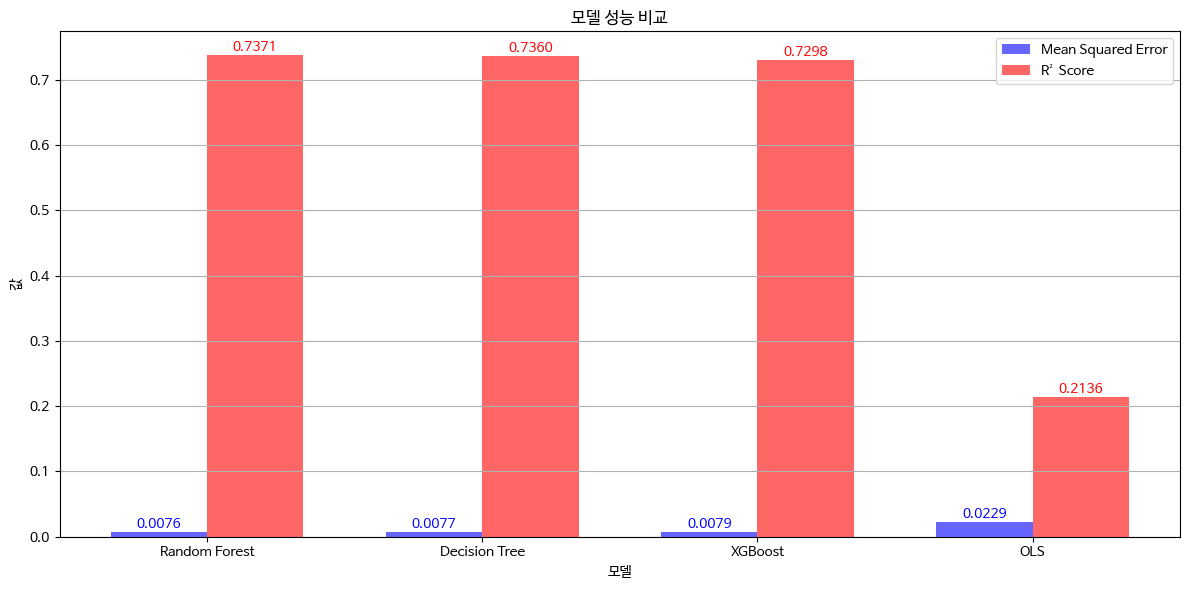

In [ ]:
import matplotlib.pyplot as plt

# 모델별 성능 지표
model_names = ["Random Forest", "Decision Tree", "XGBoost", "OLS"]
mse_values = [0.0076, 0.0077, 0.0079, 0.0229]
r2_scores = [0.7371, 0.7360, 0.7298, 0.2136]

# 그래프 설정
plt.figure(figsize=(12, 6))

# MSE 막대 그래프
bar_width = 0.35
index = range(len(model_names))

# 막대 그래프 생성
bar1 = plt.bar(index, mse_values, bar_width, label='Mean Squared Error', color='b', alpha=0.6)
bar2 = plt.bar([i + bar_width for i in index], r2_scores, bar_width, label='R² Score', color='r', alpha=0.6)

# 막대 위에 텍스트 추가
for bar in bar1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.4f}', ha='center', va='bottom', color='b')

for bar in bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.4f}', ha='center', va='bottom', color='r')

# 그래프 제목 및 레이블 설정
plt.xlabel('모델')
plt.ylabel('값')
plt.title('모델 성능 비교')
plt.xticks([i + bar_width / 2 for i in index], model_names)
plt.legend()
plt.grid(True, axis='y')

# 그래프 표시
plt.tight_layout()
plt.show()


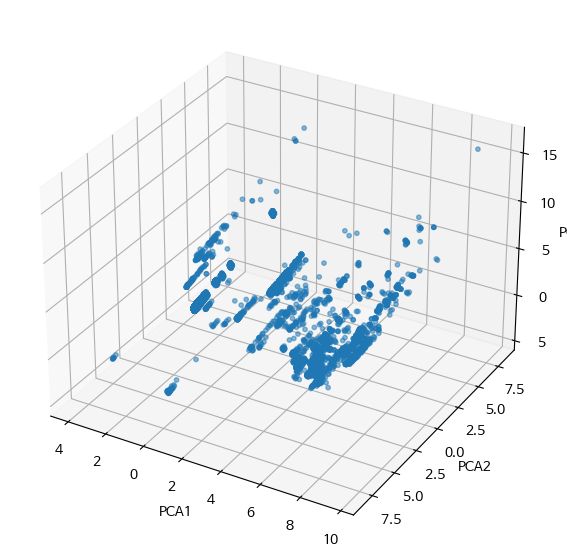

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5' 데이터를 사용
X_pca = gdf_test[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']].values

# 데이터 샘플링 (예: 10,000개의 샘플을 사용)
sample_size = 10000  # 사용할 샘플 수
if X_pca.shape[0] > sample_size:
    np.random.seed(42)  # 재현성을 위해 시드 설정
    sample_indices = np.random.choice(X_pca.shape[0], sample_size, replace=False)
    X_pca_sampled = X_pca[sample_indices]
else:
    X_pca_sampled = X_pca

# PCA에서 상위 3개의 주성분만 사용
X_pca_reduced = X_pca_sampled[:, :3]

# 전체 PCA 데이터의 3D 산점도 그리기
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], X_pca_reduced[:, 2], alpha=0.5, s=10)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()


In [ ]:
# 자치구별 데이터 수 확인

print(merged_df['자치구'].value_counts())
print('='*100)
print(gdf_test['자치구'].value_counts())
print('='*100)
print(gdf_pca_sampled['자치구'].value_counts())

자치구
영등포구    457116
동작구      44604
서초구      24640
구로구      20320
송파구      18772
은평구      16368
성북구      14196
관악구      12024
강남구      11648
강동구       8280
종로구       8004
서대문구      6400
금천구       5736
도봉구       4976
강서구       4680
강북구       4112
용산구       4060
중구        2920
노원구       2860
마포구       1768
동대문구      1560
양천구        972
중랑구        720
성동구        272
Name: count, dtype: int64
자치구
영등포구    91424
동작구      8921
서초구      4928
구로구      4064
송파구      3755
은평구      3274
성북구      2840
관악구      2405
강남구      2330
강동구      1656
종로구      1601
서대문구     1280
금천구      1148
도봉구       996
강서구       936
강북구       823
용산구       812
중구        584
노원구       572
마포구       354
동대문구      312
양천구       195
중랑구       144
성동구        55
Name: count, dtype: int64
자치구
영등포구    6751
동작구      658
서초구      363
구로구      300
송파구      277
은평구      241
성북구      209
관악구      177
강남구      172
강동구      122
종로구      118
서대문구      94
금천구       84
도봉구       73
강서구       69
강북구       60
용산구       59
중구        43
노원구   

### K-Means VS DBSCAN 군집 비교

Silhouette Scores for K-means:
K=2: 0.604
K=3: 0.617
K=4: 0.648
K=5: 0.660


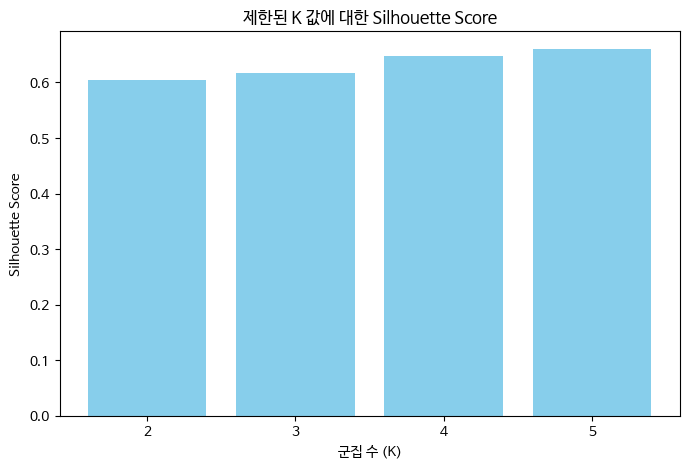

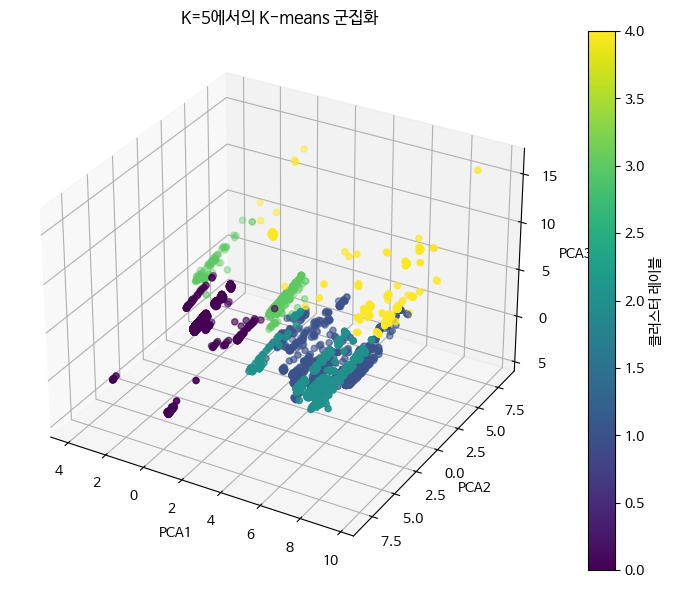

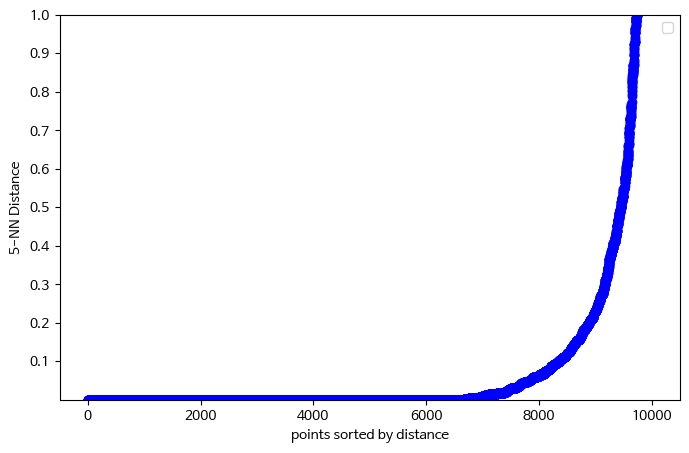

추천 eps 값: 7.39


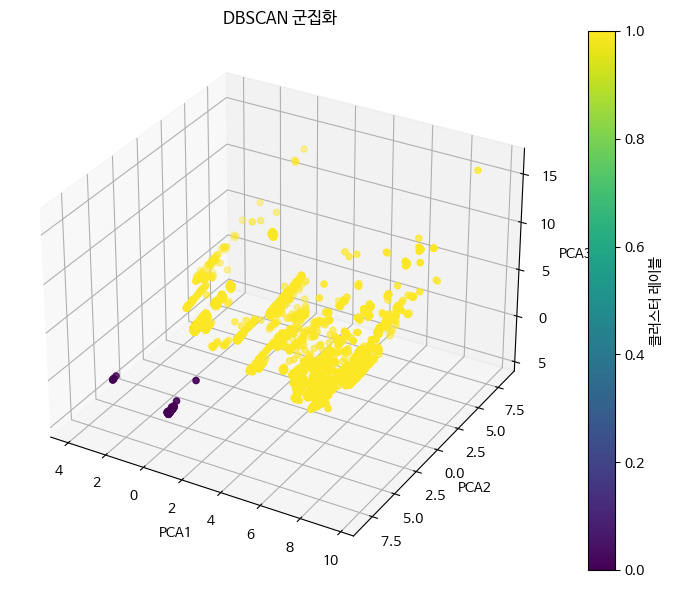

DBSCAN 실루엣 계수: 0.605
K-means 군집화 결과:
 (array([0, 1, 2, 3, 4], dtype=int32), array([6848, 1258,  843,  799,  252]))

DBSCAN 군집화 결과:
 (array([0, 1]), array([  47, 9953]))


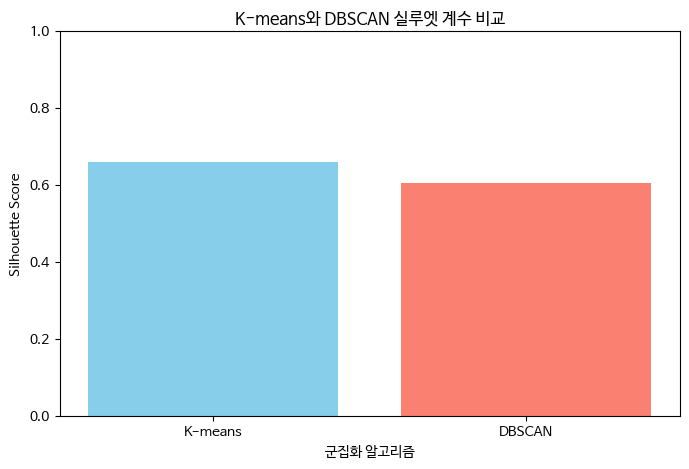

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5' 데이터를 사용
X_pca = gdf_test[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']].values

# 데이터 샘플링 (예: 10,000개의 샘플을 사용)
sample_size = 10000  # 사용할 샘플 수
if X_pca.shape[0] > sample_size:
    np.random.seed(42)  # 재현성을 위해 시드 설정
    sample_indices = np.random.choice(X_pca.shape[0], sample_size, replace=False)
    X_pca_sampled = X_pca[sample_indices]
else:
    X_pca_sampled = X_pca

# Silhouette Score 계산을 위해 제한된 군집 수만 고려 (2에서 5까지)
range_clusters = [2, 3, 4, 5]
silhouette_scores = {}

# 각 K에 대한 K-means 군집화 및 Silhouette Score 계산
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_sampled)
    silhouette = silhouette_score(X_pca_sampled, labels)
    silhouette_scores[k] = silhouette

# Silhouette Score 출력
print(f"Silhouette Scores for K-means:")
for k, score in silhouette_scores.items():
    print(f"K={k}: {score:.3f}")

# Silhouette Score 시각화
plt.figure(figsize=(8, 5))
plt.bar(range_clusters, silhouette_scores.values(), color='skyblue')
plt.title('제한된 K 값에 대한 Silhouette Score')
plt.xlabel('군집 수 (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.show()

# 가장 높은 Silhouette Score를 가진 K 선택
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca_sampled)

# K-means 군집 분석 결과 시각화 (3D 플롯, PCA 축 사용)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_sampled[:, 0], X_pca_sampled[:, 1], X_pca_sampled[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_title(f'K={optimal_k}에서의 K-means 군집화')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.colorbar(scatter, ax=ax, label='클러스터 레이블')
plt.show()

# DBSCAN: Eps-Nearest Neighbors Plot 생성 (히스틱 방법 사용)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca_sampled)
distances, indices = neighbors_fit.kneighbors(X_pca_sampled)

# 거리 정렬 및 k-거리 그래프 그리기
distances = np.sort(distances[:, 4], axis=0)

# Elbow Index를 찾는 예시
# Elbow Index를 선택하는 방법은 데이터에 따라 다를 수 있으며, 일반적으로 시각적으로 선택합니다.
# 이 코드에서는 엘보 포인트를 시각적으로 선택한다고 가정합니다.
elbow_index = np.argmax(np.diff(distances, 2)) + 1  # 2차 미분을 사용하여 엘보 포인트 추정
plt.figure(figsize=(8, 5))
plt.plot(distances, marker='o', linestyle='-', color='b')
plt.xlabel('points sorted by distance')
plt.ylabel('5-NN Distance')
plt.ylim(0, 1)  # Silhouette Score는 0에서 1 사이이므로 범위 설정
plt.yticks([0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # Y축 눈금 설정
plt.legend()
plt.show()

# 추천 eps 값
best_eps = distances[elbow_index]
print(f"추천 eps 값: {best_eps:.2f}")

# 최적의 eps 값을 사용하여 DBSCAN 군집화 수행
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca_sampled)

# DBSCAN 군집 분석 결과 시각화 (3D 플롯, PCA 축 사용)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_sampled[:, 0], X_pca_sampled[:, 1], X_pca_sampled[:, 2], c=dbscan_labels, cmap='viridis')
ax.set_title('DBSCAN 군집화')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.colorbar(scatter, ax=ax, label='클러스터 레이블')
plt.show()

# 실루엣 계수 계산 (노이즈 포인트 제거 후)
dbscan_labels_valid = dbscan_labels[dbscan_labels != -1]
X_pca_valid = X_pca_sampled[dbscan_labels != -1]
if len(np.unique(dbscan_labels_valid)) > 1:  # 적어도 2개의 클러스터가 있을 경우에만 실루엣 계수 계산
    dbscan_silhouette = silhouette_score(X_pca_valid, dbscan_labels_valid)
    print(f"DBSCAN 실루엣 계수: {dbscan_silhouette:.3f}")
else:
    dbscan_silhouette = 0
    print("DBSCAN 클러스터가 부족하여 실루엣 계수를 계산할 수 없습니다.")

# K-means와 DBSCAN 군집화 결과 비교 출력
print("K-means 군집화 결과:\n", np.unique(kmeans_labels, return_counts=True))
print("\nDBSCAN 군집화 결과:\n", np.unique(dbscan_labels, return_counts=True))

# K-means와 DBSCAN의 실루엣 계수 비교를 위한 막대그래프
plt.figure(figsize=(8, 5))
plt.bar(['K-means', 'DBSCAN'], [silhouette_scores[optimal_k], dbscan_silhouette], color=['skyblue', 'salmon'])
plt.title('K-means와 DBSCAN 실루엣 계수 비교')
plt.xlabel('군집화 알고리즘')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Silhouette Score는 0에서 1 사이이므로 범위 설정
plt.show()


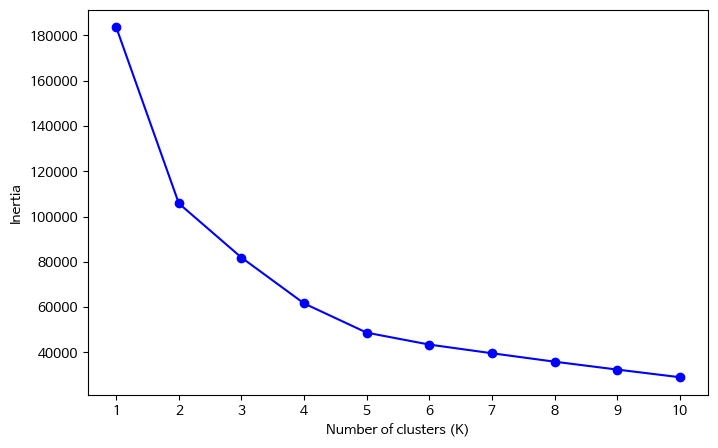

In [ ]:
# 이 코드가 있는지 확인하고, 중복 실행되는 코드가 없는지 점검합니다.
range_clusters_elbow = list(range(1, 11))  # 예시로 1부터 10까지의 클러스터 수 사용
inertias = []  # Inertia 값을 저장할 리스트 초기화

# 각 K에 대해 K-means 군집화 및 Inertia 계산
for k in range_clusters_elbow:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_sampled)
    inertias.append(kmeans.inertia_)

# Elbow 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(range_clusters_elbow, inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_clusters_elbow)
plt.show()


K=3일 때 R² 값: 0.554, MSE: 1.637
K=4일 때 R² 값: 0.665, MSE: 1.232
K=5일 때 R² 값: 0.735, MSE: 0.974


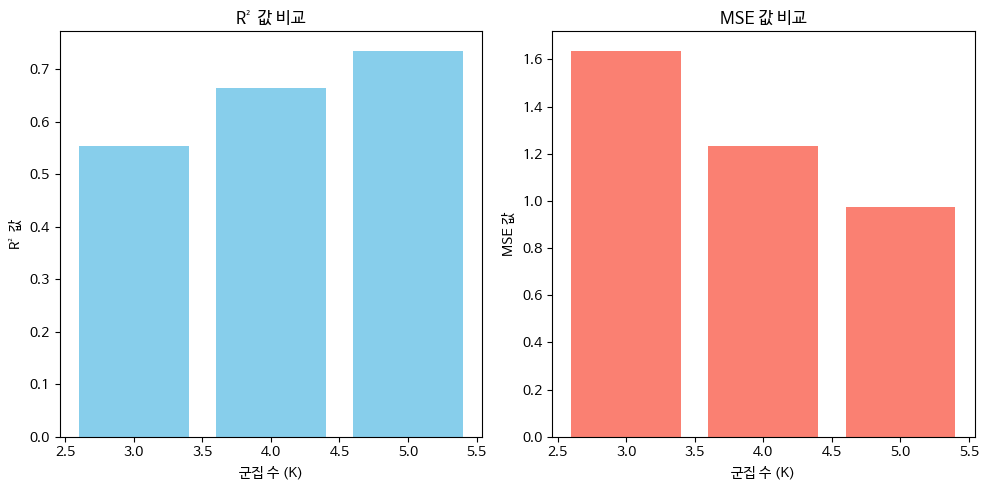

In [ ]:
from sklearn.metrics import mean_squared_error

# K = 3, 4, 5일 때 R² 값과 MSE 계산을 위한 리스트 초기화
r2_scores = {}
mse_scores = {}

# R² 값을 계산하는 함수 (inertia를 사용)
def calculate_r2(inertia, total_inertia):
    return 1 - inertia / total_inertia

# 전체 데이터의 inertia 계산 (R² 계산에 사용)
kmeans_total = KMeans(n_clusters=1, random_state=42, n_init=10).fit(X_pca_sampled)
total_inertia = kmeans_total.inertia_

# K = 3, 4, 5에 대해 K-means 군집화, R² 값 및 MSE 계산
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_sampled)

    # R² 계산
    r2_scores[k] = calculate_r2(kmeans.inertia_, total_inertia)

    # MSE 계산
    mse_scores[k] = mean_squared_error(X_pca_sampled, kmeans.cluster_centers_[kmeans.labels_])

# 결과 출력
for k in [3, 4, 5]:
    print(f"K={k}일 때 R² 값: {r2_scores[k]:.3f}, MSE: {mse_scores[k]:.3f}")

# R² 값과 MSE 값을 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.title('R² 값 비교')
plt.xlabel('군집 수 (K)')
plt.ylabel('R² 값')

plt.subplot(1, 2, 2)
plt.bar(mse_scores.keys(), mse_scores.values(), color='salmon')
plt.title('MSE 값 비교')
plt.xlabel('군집 수 (K)')
plt.ylabel('MSE 값')

plt.tight_layout()
plt.show()


In [ ]:
# 필요한 라이브러리 임포트
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5' 데이터를 사용
X_pca = gdf_test[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']].values

# 데이터 샘플링 (예: 10,000개의 샘플을 사용)
sample_size = 10000  # 사용할 샘플 수
if X_pca.shape[0] > sample_size:
    np.random.seed(42)  # 재현성을 위해 시드 설정
    sample_indices = np.random.choice(X_pca.shape[0], sample_size, replace=False)
    X_pca_sampled = X_pca[sample_indices]
else:
    X_pca_sampled = X_pca

# Elbow Method를 사용하여 최적의 K 값을 찾기 위한 코드

# 가능한 K 값의 범위 설정 (예: 1에서 10까지)
range_clusters_elbow = range(1, 11)
inertias = []

# 각 K에 대해 K-means 군집화 및 Inertia 계산
for k in range_clusters_elbow:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_sampled)
    inertias.append(kmeans.inertia_)

# Elbow Method를 위한 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(range_clusters_elbow, inertias, marker='o', linestyle='-', color='b')
plt.title('Elbow Method를 사용한 최적의 K 찾기')
plt.xlabel('군집 수 (K)')
plt.ylabel('Inertia')
plt.xticks(range_clusters_elbow)
plt.grid(True)
plt.show()


KeyError: "None of [Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'], dtype='object')] are in the [columns]"

### K-means 군집 5 지도시각화

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import folium

# 샘플 크기와 PCA 데이터 일관성 설정
sample_size = 10000
if len(gdf_test) > sample_size:
    np.random.seed(42)
    sampled_gdf_test = gdf_test.sample(n=sample_size, random_state=42)
else:
    sampled_gdf_test = gdf_test

# 실제 생성된 PCA 구성요소 개수 확인
pca_columns = [col for col in sampled_gdf_test.columns if col.startswith('PCA')]
num_pca_columns = len(pca_columns)

# PCA 결과를 사용하여 샘플 데이터 생성
X_pca_sampled = sampled_gdf_test[pca_columns].values

# K-means 클러스터링 적용
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca_sampled)

# 클러스터 레이블을 샘플링된 GeoDataFrame에 할당
sampled_gdf_test['Cluster'] = kmeans_labels

# 클러스터 ID에 따른 색상 매핑 함수
def get_cluster_color(cluster_id):
    colors = ['#ff0000', '#ff4500', '#ffa500', '#ffd700', '#ffe4b5']
    return colors[cluster_id % len(colors)]

# 각 클러스터의 지도 생성 함수
def create_individual_cluster_map(df, cluster_id, title, cluster_col='Cluster'):
    # 특정 클러스터만 필터링
    cluster_df = df[df[cluster_col] == cluster_id]
    map_center = [cluster_df['위도'].mean(), cluster_df['경도'].mean()]
    m = folium.Map(location=map_center, zoom_start=11)

    def style_function(feature):
        # 클러스터 ID에 따른 색상 설정
        color = get_cluster_color(cluster_id)
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        }

    highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

    geojson_data = cluster_df.to_json()

    folium.GeoJson(
        geojson_data,
        style_function=style_function,
        highlight_function=highlight_function,
        tooltip=folium.GeoJsonTooltip(
            fields=['Cluster'],
            aliases=['Cluster ID: '],
            localize=True
        )
    ).add_to(m)

    # 클러스터별 지도를 저장
    m.save(f"{title}_cluster_{cluster_id}_map.html")

# 실제 생성된 PCA 구성요소 개수에 맞춰 클러스터 지도 생성
for cluster_id in range(optimal_k):
    create_individual_cluster_map(sampled_gdf_test, cluster_id, 'PCA_Clustered_Depth_Map')


### 대피소 위치 지도시각화

In [ ]:
safe = pd.read_csv('대피소_최종.csv',encoding='utf-8-sig') ; safe.head(3)

,자치구,장소_종류,대피소_이름,법정동_코드,수용인원,위도,경도,대피소_분류_구분
0,영등포구,학교,양화중학교,1156012100.00000000,279,37.51977000,126.89605000,긴급
1,동작구,학교,서울신상도초등학교,1159010200.00000000,203,37.50028000,126.94406000,안전
2,영등포구,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",푸드뱅크마켓3호점,1156013200.00000000,24,37.49573000,126.90933000,안전


In [ ]:
import pandas as pd
import folium

# 대피소 데이터 불러오기
safe = pd.read_csv('대피소_최종.csv', encoding='utf-8-sig')

# 지도 중심 위치 설정 (예: 서울의 중심 좌표)
map_center = [safe['위도'].mean(), safe['경도'].mean()]

# 긴급 대피소 지도 생성
m_emergency = folium.Map(location=map_center, zoom_start=12)
for idx, row in safe[safe['대피소_분류_구분'] == '긴급'].iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['대피소_이름']} (수용인원: {row['수용인원']})",
        icon=folium.Icon(color='red', icon='exclamation-triangle'),
        tooltip=row['대피소_이름']
    ).add_to(m_emergency)

# 안전 대피소 지도 생성
m_safe = folium.Map(location=map_center, zoom_start=12)
for idx, row in safe[safe['대피소_분류_구분'] == '안전'].iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['대피소_이름']} (수용인원: {row['수용인원']})",
        icon=folium.Icon(color='blue', icon='info-sign'),
        tooltip=row['대피소_이름']
    ).add_to(m_safe)

# 지도 저장
m_emergency.save('emergency_shelter_map.html')
m_safe.save('safe_shelter_map.html')


### EDA 시각화

In [ ]:
import pandas as pd
from jinja2 import Template
import os

# 데이터프레임 병합 (df2와 df3는 이미 정의되어 있어야 합니다)
df_combined = pd.merge(df2, df3, on="자치구")

# HTML 템플릿 정의
html_template = """
<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ 자치구 }} 정보</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
        }
        .container {
            width: 300px; /* 사이드바 너비 설정 */
            margin: 20px;
            padding: 20px;
            background-color: #fff;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        .container h1 {
            font-size: 1.5em;
            margin-bottom: 20px;
            color: #333;
        }
        .intro {
            margin-bottom: 20px;
            font-size: 0.9em;
            color: #555;
        }
        .card {
            border: 1px solid #ddd;
            border-radius: 8px;
            padding: 15px;
            margin-bottom: 15px;
            display: flex;
            align-items: flex-start;
            background-color: #f9f9f9;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
        }
        .card h3 {
            margin: 0;
            font-size: 1.2em;
            color: #444;
        }
        .warning {
            color: #d9534f; /* 경고 색상 */
            font-weight: bold;
        }
        .info {
            color: #5bc0de; /* 정보 색상 */
            font-weight: bold;
        }
        .icon {
            width: 30px; /* 아이콘 크기 조절 */
            height: 30px; /* 아이콘 크기 조절 */
            margin-right: 15px;
        }
        .card-content {
            display: flex;
            align-items: flex-start;
            flex-direction: column;
            width: 100%;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>{{ 자치구 }}의 침수 관련 정보</h1>

        <!-- 소개 -->
        <div class="intro">
            <p><strong>불투수율</strong>: 바닥이 물을 얼마나 잘 흡수하는지, 높을수록 침수 위험 증가 </p>
            <p><strong>녹지율</strong>: 서울에서 녹지 지역(공원이나 숲 등)의 비율, 높을수록 물이 잘 흡수되어 침수 위험 감소 </p>
        </div>

        <!-- 불투수율 카드 -->
        <div class="card">
            <img src="https://cdn-icons-png.flaticon.com/512/68/68313.png" alt="불투수율 아이콘" class="icon">
            <div class="card-content">
                <h3>불투수율</h3>
                <p><strong>{{ 불투수율|round(1) }}%</strong>입니다.</p>
                {% if 불투수율 > 서울평균_불투수율 %}
                <p>이 지역의 불투수율이 서울시 평균인 {{ 서울평균_불투수율 }}%보다 높습니다. 이는 물이 잘 스며들지 않아 침수 위험이 더 클 수 있다는 의미입니다.</p>
                {% else %}
                <p>이 지역의 불투수율이 서울시 평균인 {{ 서울평균_불투수율 }}%과 비슷하거나 낮습니다. 침수 위험이 비교적 낮을 수 있습니다.</p>
                {% endif %}
                <p>불투수율이 높으면 비가 올 때 물이 도로와 건물 주변에 고일 가능성이 커지므로, 주의가 필요합니다.</p>
                {% if 불투수율 > 70 %}
                <p class="warning">경고: 이 지역의 불투수율이 매우 높습니다. 침수에 대비할 필요가 있습니다.</p>
                {% endif %}
            </div>
        </div>

        <!-- 녹지율 카드 -->
        <div class="card">
            <img src="https://cdn-icons-png.flaticon.com/512/35/35495.png" alt="녹지율 아이콘" class="icon">
            <div class="card-content">
                <h3>녹지율</h3>
                <p><strong>{{ 녹지율|round(1) }}%</strong>입니다.</p>
                {% if 녹지율 < 서울평균_녹지율 %}
                <p>이 지역의 녹지율이 서울시 평균인 {{ 서울평균_녹지율 }}%보다 낮습니다. 이는 식물과 나무가 적어 빗물이 잘 흡수되지 않을 수 있다는 의미입니다.</p>
                {% else %}
                <p>이 지역의 녹지율이 서울시 평균인 {{ 서울평균_녹지율 }}%과 비슷하거나 높습니다. 많은 녹지 덕분에 빗물이 잘 흡수될 수 있습니다.</p>
                {% endif %}
                <p>녹지율이 높으면 비가 올 때 물이 잘 흡수되기 때문에, 침수 위험이 줄어듭니다. 녹지를 늘리는 것이 중요합니다.</p>
            </div>
        </div>
    </div>
</body>
</html>
"""

# 서울시 평균 불투수율과 녹지율 설정
서울평균_불투수율 = 48
서울평균_녹지율 = 60

# HTML 파일로 저장할 디렉토리 생성
output_dir = 'district_info_html'
os.makedirs(output_dir, exist_ok=True)

# 자치구별로 HTML 파일 생성
for index, row in df_combined.iterrows():
    template = Template(html_template)
    html_content = template.render(
        자치구=row['자치구'],
        불투수율=row['불투수면적 비율'],
        서울평균_불투수율=서울평균_불투수율,
        녹지율=row['녹지율'],
        서울평균_녹지율=서울평균_녹지율
    )

    # HTML 파일 경로 설정
    file_path = os.path.join(output_dir, f"{row['자치구']}_info.html")

    # HTML 파일로 저장
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(html_content)

print("모든 자치구에 대한 HTML 파일이 성공적으로 생성되었습니다.")


모든 자치구에 대한 HTML 파일이 성공적으로 생성되었습니다.


### PCA 군집별 소셜 인프라 분석

In [ ]:
인구밀도 = pd.read_csv('인구밀도.csv',encoding='utf-8-sig')
거주인구 = pd.read_csv('행정동단위_거주인구.csv',encoding='utf-8-sig')
의료기관 = pd.read_csv('의료기관(구별).csv',encoding='utf-8-sig')
경찰 = pd.read_csv('서울시_경찰청위치데이터.csv',encoding='utf-8-sig')
노인 = pd.read_csv('서울시 고령자현황 데이터 2023.csv', encoding='cp949')
장애인 = pd.read_csv('서울시 구별 장애인 데이터.csv',encoding='cp949')
기초생활수급자 = pd.read_csv('기초생활수급자.csv',encoding='cp949')

In [ ]:
# '지역구' 컬럼 이름을 '자치구'로 변경
# 자치구별

인구밀도.rename(columns={'지역구': '자치구'}, inplace=True)

종합_인구밀도 = 인구밀도[인구밀도['자치구'] != '종합']
종합_인구밀도 = 종합_인구밀도[종합_인구밀도['동별'] == '종합']
종합_인구밀도 = 종합_인구밀도[['자치구', '인구밀도 (명/㎢)']] ; 종합_인구밀도.head(3)


,자치구,인구밀도 (명/㎢)
1,종로구,6365
19,중구,13131
35,용산구,10668


### 경찰 데이터 전처리

In [ ]:
경찰 = 경찰.drop(columns=['Unnamed: 0'])
경찰 = 경찰.drop(columns=['연번'])

In [ ]:
# '서울특별시' 다음의 자치구명을 추출하여 새로운 컬럼 '자치구'로 추가
경찰['자치구'] = 경찰['주소'].apply(lambda x: x.split()[1])

# 자치구별로 정리된 데이터 확인
경찰['자치구'].unique()


array(['중구', '종로구', '서대문구', '용산구', '성북구', '동대문구', '마포구', '영등포구', '성동구',
       '동작구', '광진구', '은평구', '강북구', '금천구', '중랑구', '강남구', '관악구', '강서구',
       '허준로221-22', '강동구', '구로구', '서초구', '양천구', '송파구', '노원구', '도봉구'],
      dtype=object)

In [ ]:
# 서울시의 모든 자치구 목록
서울_자치구 = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]

# 자치구 컬럼에서 서울시 자치구 목록에 없는 경우 필터링
예외_자치구 = 경찰[~경찰['자치구'].isin(서울_자치구)]

# 예외적인 데이터 출력
print(예외_자치구[['주소', '자치구']])

                                  주소        자치구
158  서울강서구 허준로221-22 염강초등학교 1층(임시청사)  허준로221-22


In [ ]:
# 자치구를 '강서구'로 수정
경찰.loc[경찰['자치구'] == '허준로221-22', '자치구'] = '강서구'
# 자치구별로 정리된 데이터 확인
경찰['자치구'].unique()

array(['중구', '종로구', '서대문구', '용산구', '성북구', '동대문구', '마포구', '영등포구', '성동구',
       '동작구', '광진구', '은평구', '강북구', '금천구', '중랑구', '강남구', '관악구', '강서구',
       '강동구', '구로구', '서초구', '양천구', '송파구', '노원구', '도봉구'], dtype=object)

In [ ]:
# 자치구별로 경찰서 개수 세기
경찰서 = 경찰.groupby('자치구').size().reset_index(name='경찰서수')

# 개수로 정렬 (내림차순)
경찰서 = 경찰서.sort_values(by='경찰서수', ascending=False)

# 결과 확인
경찰서.head(1)


,자치구,경찰서수
22,종로구,20


### 의료기관 전처리

In [ ]:
병원 = 의료기관[의료기관['자치구'] != '소계']
병원 = 병원[['자치구', '병원수']] ; 병원.head(3)

,자치구,병원수
1,종로구,482
2,중구,595
3,용산구,327


In [ ]:
# 경찰서와 병원 데이터를 자치구를 기준으로 병합
구난시설 = pd.merge(경찰서, 병원, on='자치구')

# '구난시설' 열 생성: 경찰서수와 병원수의 합
구난시설['구난시설'] = 구난시설['경찰서수'] + 구난시설['병원수']
구난시설.head(3)

,자치구,경찰서수,병원수,구난시설
0,종로구,20,482,502
1,중구,15,595,610
2,강남구,14,2866,2880


In [ ]:
노인.rename(columns={'구별코드': '자치구'}, inplace=True)
노인.rename(columns={'전체인구': '노인_전체인구'}, inplace=True)
노인 = 노인[노인['자치구'] != '소계']
노인 = 노인[['자치구', '노인_전체인구']] ; 노인.head(3)

,자치구,노인_전체인구
0,강남구,550282
1,강동구,463318
2,강북구,292977


In [ ]:
장애인.rename(columns={'구별코드': '자치구'}, inplace=True)
장애인.rename(columns={'계': '장애인_전체인구'}, inplace=True)
장애인 = 장애인[장애인['자치구'] != '계']
장애인 = 장애인[['자치구', '장애인_전체인구']] ; 장애인.head(3)

,자치구,장애인_전체인구
1,종로구,5692
2,중구,5461
3,용산구,7302


In [ ]:
# 1. '구별코드' 컬럼 이름을 '자치구'로 변경
기초생활수급자.rename(columns={'구별코드': '자치구'}, inplace=True)

# 2. '총 수급자 남'과 '총 수급자 여'의 NaN 및 무한대 값 처리 후 정수형으로 변환
기초생활수급자['총 수급자 남'] = 기초생활수급자['총 수급자 남'].replace([np.inf, -np.inf], 0).fillna(0)
기초생활수급자['총 수급자 여'] = 기초생활수급자['총 수급자 여'].replace([np.inf, -np.inf], 0).fillna(0)

# '기초생활수급자_전체인구' 계산
기초생활수급자['기초생활수급자_전체인구'] = (기초생활수급자['총 수급자 남'] + 기초생활수급자['총 수급자 여']).astype(int)

# 3. '자치구'가 '합계'와 '본청'인 행을 제외
기초생활수급자 = 기초생활수급자[~기초생활수급자['자치구'].isin(['합계', '본청'])]

# 4. 자치구별로 '기초생활수급자_전체인구' 합산
기초생활수급자 = 기초생활수급자.groupby('자치구', as_index=False).agg({
    '기초생활수급자_전체인구': 'sum'
})

# 결과 확인
기초생활수급자.head(3)


,자치구,기초생활수급자_전체인구
0,강남구,32234
1,강동구,34934
2,강북구,45692


In [ ]:
# '행정동' 컬럼에서 자치구를 추출하여 '자치구' 컬럼에 저장
거주인구['자치구'] = 거주인구['행정동'].apply(lambda x: x.split()[0])

# '자치구' 컬럼을 첫 번째 위치로 이동
columns = ['자치구'] + [col for col in 거주인구.columns if col != '자치구']
거주인구 = 거주인구[columns]

# 자치구별로 데이터 집계
거주인구 = 거주인구.groupby('자치구').sum().reset_index()

# '자치구'가 'Unknown'인 행 제거
거주인구 = 거주인구[거주인구['자치구'] != 'Unknown']

# 자치구와 총생활인구수만 선택
거주인구 = 거주인구[['자치구', '총생활인구수']]

# 결과 확인
거주인구.head(3)

,자치구,총생활인구수
1,강남구,592180949.18920004
2,강동구,359079633.71039999
3,강북구,192432693.29899999


### 자치구별 노인 비율

In [ ]:
# 자치구별로 총생활인구수와 노인 인구 수를 병합
social_df = pd.merge(거주인구, 노인, on='자치구', how='left')

# 노인 인구 비율 계산
social_df['노인 인구 비율 (%)'] = (social_df['노인_전체인구'] / social_df['총생활인구수']) * 100

# 소수점 둘째 자리까지 출력 포맷 설정
pd.options.display.float_format = '{:.2f}'.format

# 결과 확인
social_df[['자치구', '노인 인구 비율 (%)']].head(3)


,자치구,노인 인구 비율 (%)
0,강남구,0.09
1,강동구,0.13
2,강북구,0.15


### 자치구별 장애인 비율

In [ ]:
# 자치구별로 총생활인구수와 장애인 인구 수를 병합
social_df = pd.merge(거주인구, 장애인, on='자치구', how='left')

# 장애인 인구 비율 계산
social_df['장애인 인구 비율 (%)'] = (social_df['장애인_전체인구'] / social_df['총생활인구수']) * 100

# 소수점 둘째 자리까지 출력 포맷 설정
pd.options.display.float_format = '{:.3f}'.format

# 결과 확인
social_df[['자치구', '장애인 인구 비율 (%)']].head(3)

,자치구,장애인 인구 비율 (%)
0,강남구,0.003
1,강동구,0.005
2,강북구,0.009


### 자치구 기초생활수급자 비율

In [ ]:
# 자치구별로 총생활인구수와 기초생활수급자_전체인구를 병합
social_df = pd.merge(거주인구, 기초생활수급자, on='자치구', how='left')

# 기초생활수급자 인구 비율 계산
social_df['기초생활수급자_인구 비율 (%)'] = (social_df['기초생활수급자_전체인구'] / social_df['총생활인구수']) * 100

# 소수점 둘째 자리까지 출력 포맷 설정
pd.options.display.float_format = '{:.3f}'.format

# 결과 확인
social_df[['자치구', '기초생활수급자_인구 비율 (%)']].head(3)

,자치구,기초생활수급자_인구 비율 (%)
0,강남구,0.005
1,강동구,0.010
2,강북구,0.024


### 자치구 구난시설 비율

In [ ]:
구전체면적 = pd.DataFrame({
    '자치구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
             '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
             '관악구', '서초구', '강남구', '송파구', '강동구'],
    '구전체면적': [2312.4, 998.2, 2196.7, 1642.2, 1788.9, 1459.4, 1829.9, 2487.1, 2381.9, 2077.7,
                 3575.5, 3133.1, 1782.2, 2347.4, 1736.6, 4207.7, 2009.6, 1294.6, 2461.8, 1646.0,
                 2996.6, 4695.5, 3970.4, 3310.9, 2523.6]  # 제공된 데이터
})

# 총생활인구수와 구난시설 수를 병합
social_df = pd.merge(거주인구, 구난시설, on='자치구', how='left')
social_df = pd.merge(social_df, 구전체면적, on='자치구', how='left')

# 구난시설 비율 계산 (면적 대비 구난시설 개수)
social_df['구난시설 비율 (시설/면적)'] = social_df['구난시설'] / social_df['구전체면적']

# 소수점 둘째 자리까지 포맷 설정
pd.options.display.float_format = '{:.2f}'.format

# 결과 확인
social_df[['자치구', '구난시설 비율 (시설/면적)']].head(3)

,자치구,구난시설 비율 (시설/면적)
0,강남구,0.73
1,강동구,0.35
2,강북구,0.20


### 자치구 정보를 포함한 샘플링된 데이터프레임 생성

In [ ]:
# 실제 존재하는 PCA 열 목록 추출
existing_pca_columns = [col for col in sampled_gdf_test.columns if col.startswith('PCA')]

# 자치구 정보를 포함한 샘플링된 데이터프레임 생성
# 'Cluster', '자치구' 열이 포함되도록 확장
required_columns = existing_pca_columns + ['Cluster', '자치구']
sampled_gdf_test = sampled_gdf_test[required_columns]

# 각 자치구가 속한 클러스터 확인 및 클러스터별로 정렬
# '자치구', 'Cluster' 순으로 그룹화 후 'Count' 기준으로 정렬
cluster_counts = sampled_gdf_test.groupby(['Cluster', '자치구']).size().reset_index(name='Count')

# 클러스터별로 정렬
cluster_counts_sorted = cluster_counts.sort_values(by=['Cluster', 'Count'], ascending=[True, False])

# 결과 출력
cluster_counts_sorted

,Cluster,자치구,Count
4,0,영등포구,6620
3,0,성북구,104
0,0,구로구,58
5,0,중구,47
2,0,마포구,17
1,0,노원구,2
20,1,은평구,239
9,1,구로구,207
8,1,관악구,136
6,1,강동구,124


In [ ]:
import pandas as pd

# 소수점 4자리까지 출력하도록 설정
pd.options.display.float_format = '{:.4f}'.format

# 자치구별로 총생활인구수와 노인 인구 수를 병합
social_df = pd.merge(거주인구, 노인, on='자치구', how='left')

# 노인 인구 비율 계산
social_df['노인 인구 비율 (%)'] = (social_df['노인_전체인구'] / social_df['총생활인구수']) * 100

# 자치구별로 총생활인구수와 장애인 인구 수를 병합
social_df = pd.merge(social_df, 장애인, on='자치구', how='left')

# 장애인 인구 비율 계산
social_df['장애인 인구 비율 (%)'] = (social_df['장애인_전체인구'] / social_df['총생활인구수']) * 100

# 자치구별로 총생활인구수와 기초생활수급자_전체인구를 병합
social_df = pd.merge(social_df, 기초생활수급자, on='자치구', how='left')

# 기초생활수급자 인구 비율 계산
social_df['기초생활수급자_인구 비율 (%)'] = (social_df['기초생활수급자_전체인구'] / social_df['총생활인구수']) * 100

# 구전체면적 데이터를 병합
social_df = pd.merge(social_df, 구전체면적, on='자치구', how='left')

# 자치구별로 총생활인구수와 구난시설 수를 병합
social_df = pd.merge(social_df, 구난시설, on='자치구', how='left')

# 구난시설 비율 계산 (면적 대비 구난시설 개수)
social_df['구난시설 비율 (시설/면적)'] = social_df['구난시설'] / social_df['구전체면적']

# 필요한 데이터프레임 결합
social_data = pd.merge(cluster_counts, 종합_인구밀도, on='자치구', how='left')
social_data = pd.merge(social_data, social_df, on='자치구', how='left')

# 군집별 자치구 데이터 출력 함수
def print_cluster_details(social_data, cluster_number):
    cluster_data = social_data[social_data['Cluster'] == cluster_number]
    print(f"\nCluster {cluster_number} - 자치구별 소셜 데이터:")
    print(cluster_data[['자치구', '인구밀도 (명/㎢)', '노인 인구 비율 (%)', '장애인 인구 비율 (%)', '기초생활수급자_인구 비율 (%)', '구난시설 비율 (시설/면적)']])

# 군집별 데이터 출력
print_cluster_details(social_data, 0)
print_cluster_details(social_data, 1)
print_cluster_details(social_data, 2)
print_cluster_details(social_data, 3)
print_cluster_details(social_data, 4)



Cluster 0 - 자치구별 소셜 데이터:
    자치구  인구밀도 (명/㎢)  노인 인구 비율 (%)  장애인 인구 비율 (%)  기초생활수급자_인구 비율 (%)  \
0   구로구       20794        0.1510         0.0069             0.0108   
1   노원구       14335        0.1637         0.0086             0.0211   
2   마포구       15745        0.1178         0.0040             0.0070   
3   성북구       17983        0.1587         0.0062             0.0125   
4  영등포구       16215        0.1172         0.0043             0.0071   
5    중구       13131        0.0974         0.0040             0.0091   

   구난시설 비율 (시설/면적)  
0           0.3006  
1           0.2128  
2           0.3314  
3           0.2219  
4           0.3278  
5           0.6111  

Cluster 1 - 자치구별 소셜 데이터:
     자치구  인구밀도 (명/㎢)  노인 인구 비율 (%)  장애인 인구 비율 (%)  기초생활수급자_인구 비율 (%)  \
6    강동구       18871        0.1290         0.0052             0.0097   
7    강북구       12614        0.1522         0.0088             0.0237   
8    관악구       16951        0.1539         0.0062             0.0144   
9    구로구       

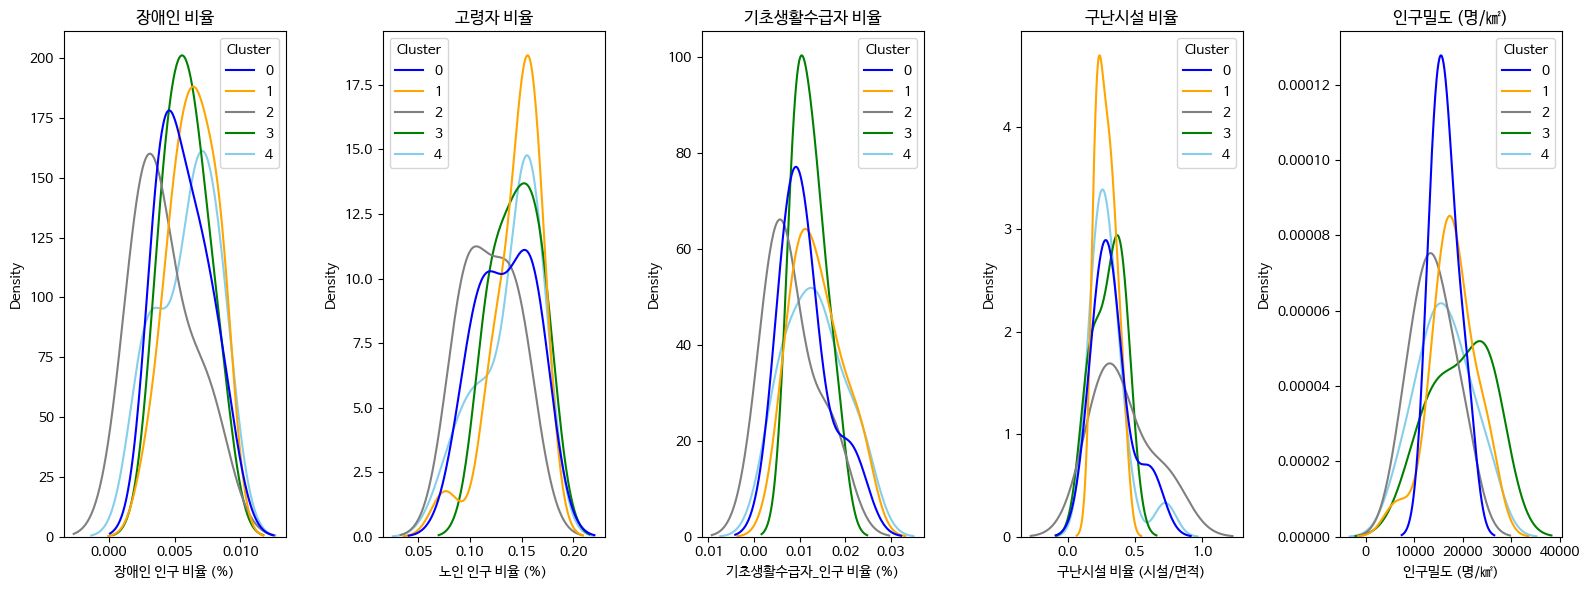

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 데이터 준비
# Replace 'social_data' with your actual dataset variable name.
kde_data = social_data[['Cluster', '장애인 인구 비율 (%)', '노인 인구 비율 (%)', '기초생활수급자_인구 비율 (%)', '구난시설 비율 (시설/면적)', '인구밀도 (명/㎢)']]

# 클러스터별 색깔 지정 (숫자형 클러스터에 맞게 수정)
cluster_palette = {
    0: 'blue',      # 강수량 영향을 많이 받는 지역
    1: 'orange',    # 불투수면적 높고 녹지면적 적은 지역
    2: 'gray',      # 오래된 건물과 지하 건물이 많은 지역
    3: 'green',     # 녹지가 많은 지역
    4: 'skyblue'    # 하천과 가까워 침수 위험이 있는 지역
}

# 그래프 그리기
plt.figure(figsize=(16, 6))

# 장애인 비율 KDE plot
plt.subplot(1, 5, 1)
sns.kdeplot(data=kde_data, x='장애인 인구 비율 (%)', hue='Cluster', common_norm=False, palette=cluster_palette)
plt.title('장애인 비율')

# 고령자 비율 KDE plot
plt.subplot(1, 5, 2)
sns.kdeplot(data=kde_data, x='노인 인구 비율 (%)', hue='Cluster', common_norm=False, palette=cluster_palette)
plt.title('고령자 비율')

# 기초생활수급자 비율 KDE plot
plt.subplot(1, 5, 3)
sns.kdeplot(data=kde_data, x='기초생활수급자_인구 비율 (%)', hue='Cluster', common_norm=False, palette=cluster_palette)
plt.title('기초생활수급자 비율')

# 구난시설 비율 KDE plot
plt.subplot(1, 5, 4)
sns.kdeplot(data=kde_data, x='구난시설 비율 (시설/면적)', hue='Cluster', common_norm=False, palette=cluster_palette)
plt.title('구난시설 비율')

# 인구밀도 KDE plot
plt.subplot(1, 5, 5)
sns.kdeplot(data=kde_data, x='인구밀도 (명/㎢)', hue='Cluster', common_norm=False, palette=cluster_palette)
plt.title('인구밀도 (명/㎢)')

plt.tight_layout()
plt.show()


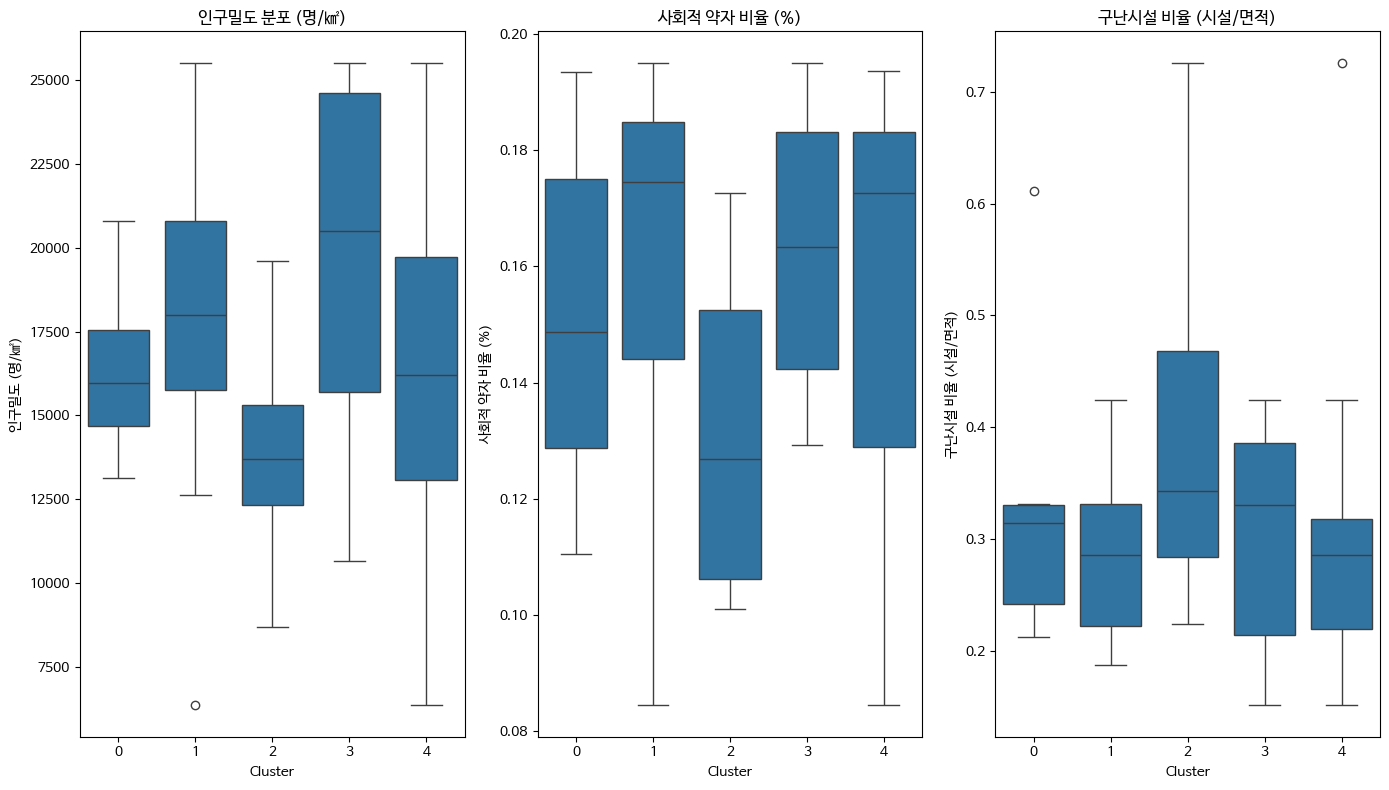

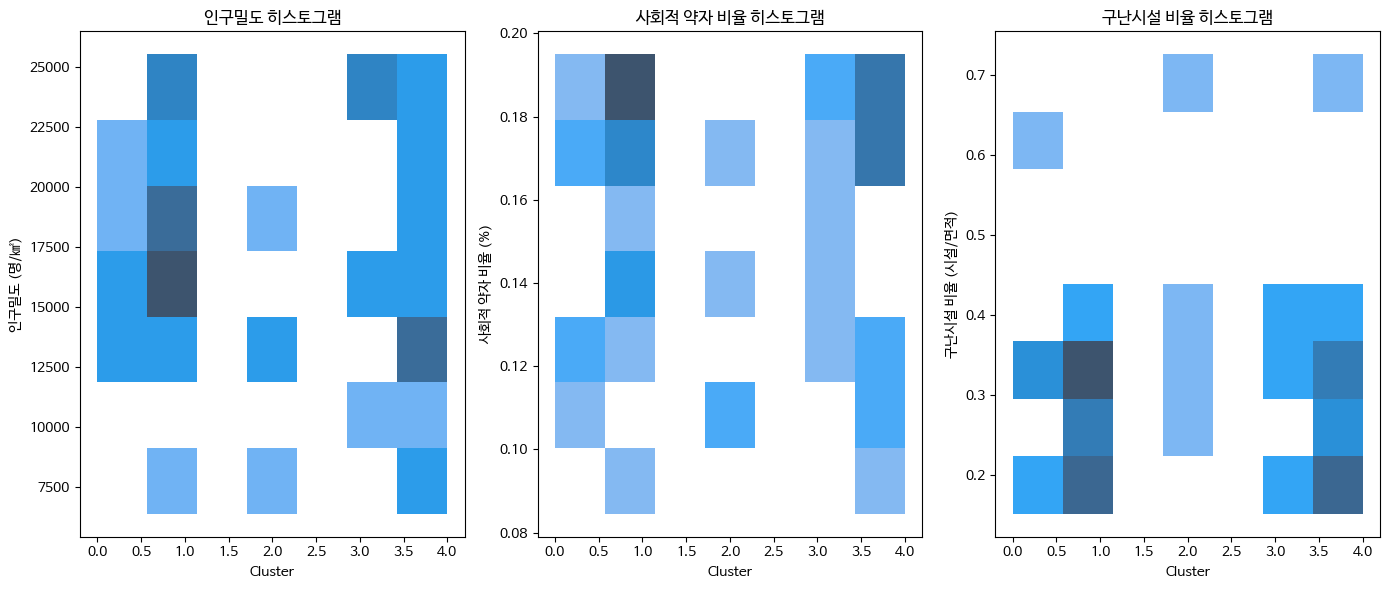

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 데이터 준비
cluster_groups = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# 박스 플롯을 그릴 데이터
boxplot_data = social_data[['Cluster', '인구밀도 (명/㎢)', '노인 인구 비율 (%)', '장애인 인구 비율 (%)', '기초생활수급자_인구 비율 (%)', '구난시설 비율 (시설/면적)']]

# 사회적 약자 비율(노인, 장애인, 기초생활수급자) 통합 비율 계산
boxplot_data['사회적 약자 비율 (%)'] = boxplot_data['노인 인구 비율 (%)'] + boxplot_data['장애인 인구 비율 (%)'] + boxplot_data['기초생활수급자_인구 비율 (%)']

# 그래프 사이즈 설정
plt.figure(figsize=(14, 8))

# 박스 플롯: 인구밀도
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='인구밀도 (명/㎢)', data=boxplot_data)
plt.title('인구밀도 분포 (명/㎢)')

# 박스 플롯: 사회적 약자 비율
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='사회적 약자 비율 (%)', data=boxplot_data)
plt.title('사회적 약자 비율 (%)')

# 박스 플롯: 구난시설 비율
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='구난시설 비율 (시설/면적)', data=boxplot_data)
plt.title('구난시설 비율 (시설/면적)')

plt.tight_layout()
plt.show()

# 히스토그램(라인 그래프) 그리기
plt.figure(figsize=(14, 6))

# 히스토그램: 인구밀도
plt.subplot(1, 3, 1)
sns.histplot(data=boxplot_data, x='Cluster', y='인구밀도 (명/㎢)', kde=True)
plt.title('인구밀도 히스토그램')

# 히스토그램: 사회적 약자 비율
plt.subplot(1, 3, 2)
sns.histplot(data=boxplot_data, x='Cluster', y='사회적 약자 비율 (%)', kde=True)
plt.title('사회적 약자 비율 히스토그램')

# 히스토그램: 구난시설 비율
plt.subplot(1, 3, 3)
sns.histplot(data=boxplot_data, x='Cluster', y='구난시설 비율 (시설/면적)', kde=True)
plt.title('구난시설 비율 히스토그램')

plt.tight_layout()
plt.show()


### 소셜데이터 정보 html

In [ ]:
import pandas as pd
from jinja2 import Template
import os

# HTML 템플릿 정의
html_template = """
<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ 자치구 }} 정보</title>
    <style>
        body {
            font-family: 'Arial', sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
            display: flex;
            flex-direction: column;
        }
        .sidebar {
            width: 300px;
            padding: 15px;
            background-color: #fff;
            border-right: 1px solid #ddd;
            box-shadow: 0 0 8px rgba(0, 0, 0, 0.1);
            overflow-y: auto;
            height: 100vh;
        }
        h1 {
            font-size: 1.6em;
            margin-bottom: 15px;
            color: #333;
        }
        .info {
            margin-bottom: 15px;
            font-size: 0.9em;
            color: #555;
        }
        .summary {
            font-size: 1em;
            color: #333;
            margin-bottom: 20px;
            border-top: 2px solid #ddd;
            padding-top: 10px;
            line-height: 1.6;
        }
        .metric {
            margin-bottom: 20px;
            padding: 12px;
            border-radius: 6px;
            background-color: #fff;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
        }
        .metric h3 {
            margin: 0 0 8px;
            font-size: 1.2em;
            color: #444;
        }
        .metric p {
            margin: 0;
            font-size: 0.9em;
            color: #666;
            line-height: 1.6;
        }
        .highlight {
            color: #d9534f;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <div class="sidebar">
        <h1>{{ 자치구 }}의 주요 정보</h1>

        <!-- 구난시설 비율 설명 -->
        <div class="summary">
            <h2>구난시설 비율</h2>
            <p>구난시설 비율은 해당 지역의 구난시설이 면적에 비해 얼마나 배치되어 있는지를 나타냅니다.</p>
            <p>높은 비율은 구난시설이 잘 배치되어 있어 비상 상황에 대응하기 좋다는 것을 의미합니다.</p>
        </div>

        <!-- 구난시설 비율 카드 -->
        <div class="metric">
            <h3>구난시설 비율</h3>
            <p>구난시설 비율: <span class="highlight">{{ 구난시설_비율 }}%</span> (시설/면적)</p>
        </div>

        <!-- 불투수율 설명 -->
        <div class="summary">
            <h2>불투수율</h2>
            <p>불투수율은 비가 올 때 물이 지면에 스며드는 비율을 나타냅니다.</p>
            <p>높은 불투수율은 물이 지면에 잘 스며들지 않고 도로와 건물 주변에 고일 가능성이 높다는 것을 의미합니다.</p>
        </div>

        <!-- 불투수율 카드 -->
        <div class="metric">
            <h3>불투수율</h3>
            <p><strong>{{ 불투수율 }}%</strong></p>
            {% if 불투수율 > 서울평균_불투수율 %}
            <p>불투수율이 서울시 평균인 {{ 서울평균_불투수율 }}%보다 높습니다.</p>
            <p>물이가 잘 스며들지 않아 침수 위험이 클 수 있습니다.</p>
            {% else %}
            <p>불투수율이 서울시 평균인 {{ 서울평균_불투수율 }}%과 비슷하거나 낮습니다.</p>
            <p>침수 위험이 비교적 낮습니다.</p>
            {% endif %}
            {% if 불투수율 > 70 %}
            <p class="highlight">경고: 불투수율이 매우 높습니다. 침수에 대비하세요.</p>
            {% endif %}
        </div>

        <!-- 녹지율 설명 -->
        <div class="summary">
            <h2>녹지율</h2>
            <p>녹지율은 지역 내 녹지 면적의 비율을 나타냅니다.</p>
            <p>높은 녹지율은 식물과 나무가 많아 비가 올 때 빗물이 잘 흡수될 수 있음을 의미합니다.</p>
        </div>

        <!-- 녹지율 카드 -->
        <div class="metric">
            <h3>녹지율</h3>
            <p><strong>{{ 녹지율 }}%</strong></p>
            {% if 녹지율 < 서울평균_녹지율 %}
            <p>녹지율이 서울시 평균인 {{ 서울평균_녹지율 }}%보다 낮습니다.</p>
            <p>식물과 나무가 적어 빗물이 잘 흡수되지 않을 수 있습니다.</p>
            {% else %}
            <p>녹지율이 서울시 평균인 {{ 서울평균_녹지율 }}%과 비슷하거나 높습니다.</p>
            <p>많은 녹지 덕분에 빗물이 잘 흡수됩니다.</p>
            {% endif %}
        </div>
    </div>
</body>
</html>
"""

# HTML 파일로 저장할 디렉토리 생성
output_dir = 'district_info_html'
os.makedirs(output_dir, exist_ok=True)

# 자치구별로 HTML 파일 생성
for index, row in social_data.iterrows():
    template = Template(html_template)
    # 소수점으로 된 비율 값을 퍼센트 값으로 변환
    구난시설_비율 = row['구난시설 비율 (시설/면적)'] * 100  # 퍼센트로 변환
    불투수율 = 50  # 예시 값, 실제 데이터로 대체 필요
    녹지율 = 30     # 예시 값, 실제 데이터로 대체 필요
    서울평균_불투수율 = 60  # 예시 값, 실제 데이터로 대체 필요
    서울평균_녹지율 = 35    # 예시 값, 실제 데이터로 대체 필요

    html_content = template.render(
        자치구=row['자치구'],
        구난시설_비율=f"{구난시설_비율:.1f}",
        불투수율=불투수율,
        녹지율=녹지율,
        서울평균_불투수율=서울평균_불투수율,
        서울평균_녹지율=서울평균_녹지율
    )

    # HTML 파일 경로 설정
    file_path = os.path.join(output_dir, f"{row['자치구']}_info.html")

    # HTML 파일로 저장
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(html_content)

print("모든 자치구에 대한 HTML 파일이 성공적으로 생성되었습니다.")


모든 자치구에 대한 HTML 파일이 성공적으로 생성되었습니다.


### 침수취약지역 상위 5개구 확인

In [ ]:
'''
# PCA 적용 결과로 데이터 변환
X_test_reduced = X_test_pca[:, :num_components]

# 침수수심이 깊은 상위 5개 지역 추출
gdf_test['예측수심'] = best_y_pred
top5_flood_prone = gdf_test.nlargest(5, '예측수심')

print("침수수심이 가장 깊은 상위 5개 지역:")
print(top5_flood_prone[['예측수심', '위도', '경도']])

# Optional: 지도에 상위 5개 지역 강조 표시 (Folium)
map_top5 = folium.Map(location=map_center, zoom_start=11)

# 상위 5개 지역을 강조하는 스타일 함수 정의
def highlight_top5_style_function(feature):
    return {
        'fillColor': '#ff0000',  # 빨간색
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.8
    }

# GeoDataFrame을 GeoJSON으로 변환
geojson_top5_data = top5_flood_prone.to_json()

# Folium GeoJson 추가
folium.GeoJson(
    geojson_top5_data,
    style_function=highlight_top5_style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['예측수심'],
        aliases=['예측 침수수심: '],
        localize=True
    )
).add_to(map_top5)

# 지도 저장
map_top5.save("top5_flood_prone_areas.html")
'''

'\n# PCA 적용 결과로 데이터 변환\nX_test_reduced = X_test_pca[:, :num_components]\n\n# 침수수심이 깊은 상위 5개 지역 추출\ngdf_test[\'예측수심\'] = best_y_pred\ntop5_flood_prone = gdf_test.nlargest(5, \'예측수심\')\n\nprint("침수수심이 가장 깊은 상위 5개 지역:")\nprint(top5_flood_prone[[\'예측수심\', \'위도\', \'경도\']])\n\n# Optional: 지도에 상위 5개 지역 강조 표시 (Folium)\nmap_top5 = folium.Map(location=map_center, zoom_start=11)\n\n# 상위 5개 지역을 강조하는 스타일 함수 정의\ndef highlight_top5_style_function(feature):\n    return {\n        \'fillColor\': \'#ff0000\',  # 빨간색\n        \'color\': \'black\',\n        \'weight\': 2,\n        \'fillOpacity\': 0.8\n    }\n\n# GeoDataFrame을 GeoJSON으로 변환\ngeojson_top5_data = top5_flood_prone.to_json()\n\n# Folium GeoJson 추가\nfolium.GeoJson(\n    geojson_top5_data,\n    style_function=highlight_top5_style_function,\n    tooltip=folium.GeoJsonTooltip(\n        fields=[\'예측수심\'],\n        aliases=[\'예측 침수수심: \'],\n        localize=True\n    )\n).add_to(map_top5)\n\n# 지도 저장\nmap_top5.save("top5_flood_prone_areas.html")\n'

### 예측침수수심 0.6이상

In [ ]:
'''
# 예측 침수수심이 0.6 이상인 지역만 필터링
gdf_filtered = gdf_test[gdf_test['예측수심'] >= 0.6]

print("예측 침수수심이 0.6 이상인 지역:")
print(gdf_filtered[['예측수심', '위도', '경도']])

# Folium 지도 생성 및 시각화 (필터링된 데이터)
map_filtered = folium.Map(location=map_center, zoom_start=11)

# 필터링된 지역을 강조하는 스타일 함수 정의
def highlight_filtered_style_function(feature):
    return {
        'fillColor': '#ff6347',  # 토마토색
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7
    }

# GeoDataFrame을 GeoJSON으로 변환
geojson_filtered_data = gdf_filtered.to_json()

# Folium GeoJson 추가
folium.GeoJson(
    geojson_filtered_data,
    style_function=highlight_filtered_style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['예측수심'],
        aliases=['예측 침수수심: '],
        localize=True
    )
).add_to(map_filtered)

# 지도 저장
map_filtered.save("filtered_flood_prone_areas.html")
'''

'\n# 예측 침수수심이 0.6 이상인 지역만 필터링\ngdf_filtered = gdf_test[gdf_test[\'예측수심\'] >= 0.6]\n\nprint("예측 침수수심이 0.6 이상인 지역:")\nprint(gdf_filtered[[\'예측수심\', \'위도\', \'경도\']])\n\n# Folium 지도 생성 및 시각화 (필터링된 데이터)\nmap_filtered = folium.Map(location=map_center, zoom_start=11)\n\n# 필터링된 지역을 강조하는 스타일 함수 정의\ndef highlight_filtered_style_function(feature):\n    return {\n        \'fillColor\': \'#ff6347\',  # 토마토색\n        \'color\': \'black\',\n        \'weight\': 2,\n        \'fillOpacity\': 0.7\n    }\n\n# GeoDataFrame을 GeoJSON으로 변환\ngeojson_filtered_data = gdf_filtered.to_json()\n\n# Folium GeoJson 추가\nfolium.GeoJson(\n    geojson_filtered_data,\n    style_function=highlight_filtered_style_function,\n    tooltip=folium.GeoJsonTooltip(\n        fields=[\'예측수심\'],\n        aliases=[\'예측 침수수심: \'],\n        localize=True\n    )\n).add_to(map_filtered)\n\n# 지도 저장\nmap_filtered.save("filtered_flood_prone_areas.html")\n'

### plotly 시각화

In [ ]:
import plotly.express as px
import geopandas as gpd
import json

# GeoDataFrame을 GeoJSON 형식으로 변환
geojson_data = json.loads(gdf_test.to_json())

# 데이터의 최대값을 1m로 스케일링
gdf_test['예측수심_scaled'] = gdf_test['예측수심'].clip(upper=1)

# 침수수심을 기준으로 내림차순 정렬하여 상위 3000개 선택
top_3000_gdf = gdf_test.nlargest(3000, '예측수심')

# 사용자 정의 색상 스케일 설정
color_scale = [
    [0, '#ffffe0'],  # 0m - 연한 노란색
    [0.2, '#fffacd'],  # 0.2m - 연한 옐로우
    [0.4, '#ffe4b5'],  # 0.4m - 연한 주황색
    [0.6, '#ffd700'],  # 0.6m - 금색
    [0.8, '#ff8c00'],  # 0.8m - 다크 오렌지색
    [1, '#ff0000']  # 1.0m - 빨간색
]

# Plotly 지도 시각화
fig = px.choropleth_mapbox(
    top_3000_gdf,  # 필터링된 GeoDataFrame 데이터
    geojson=geojson_data,  # GeoJSON 데이터
    locations=top_3000_gdf.index,  # 고유 인덱스를 위치로 사용
    color='예측수심_scaled',  # 색상으로 사용할 열
    color_continuous_scale=color_scale,  # 사용자 정의 색상 스케일
    range_color=[0, 1],  # 스케일 범위 설정
    mapbox_style="carto-positron",  # 지도 스타일
    zoom=11,  # 초기 줌 레벨
    center={"lat": top_3000_gdf['위도'].mean(), "lon": top_3000_gdf['경도'].mean()},  # 중심 좌표
    opacity=0.6,  # 폴리곤 투명도
    labels={'예측수심_scaled': '예측 침수수심 (m)'},  # 레이블 설정
    title="상위 3000개 예측 침수수심 지도"
)

# 지도 표시
fig.show()


### 참고

### PCA 및 군집화

In [ ]:
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# K-means 군집화 (군집 개수는 예시로 3개로 설정)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['군집'] = kmeans.fit_predict(X_pca)
'''

### 위도 및 경도 정보 통합

In [ ]:
'''
# GeoDataFrame에서 위도와 경도 추출
gdf['위도'] = gdf.geometry.centroid.y
gdf['경도'] = gdf.geometry.centroid.x

# PCA 데이터프레임에 위도 및 경도 추가
pca_df = pca_df.join(gdf[['위도', '경도']], how='left')
'''

### Folium을 사용한 지도 시각화

In [ ]:
'''
import folium
from shapely.geometry import Point
import geopandas as gpd

# Folium 지도 시각화
map_center = [pca_df['위도'].mean(), pca_df['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)

# 군집별로 색상을 다르게 설정
colors = ['red', 'blue', 'green']

# 군집별로 지도에 마커 추가
for cluster in pca_df['군집'].unique():
    cluster_data = pca_df[pca_df['군집'] == cluster]
    folium.Marker(
        location=[cluster_data['위도'].mean(), cluster_data['경도'].mean()],
        popup=f'군집 {cluster}',
        icon=folium.Icon(color=colors[cluster])
    ).add_to(map)

# 결과를 HTML 파일로 저장
map.save('clustered_map.html')
'''

In [ ]:
'''
pca_df['위도'] = gdf.geometry.centroid.y
pca_df['경도'] = gdf.geometry.centroid.x

# GeoDataFrame 생성
geometry = [Point(xy) for xy in zip(pca_df['경도'], pca_df['위도'])]
geo_df = gpd.GeoDataFrame(pca_df, geometry=geometry)

# Folium 지도 시각화
map_center = [pca_df['위도'].mean(), pca_df['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)

# 군집별로 색상을 다르게 설정
colors = ['red', 'blue', 'green']

# 군집별로 지도에 마커 추가
for cluster in pca_df['군집'].unique():
    cluster_data = pca_df[pca_df['군집'] == cluster]
    folium.Marker(
        location=[cluster_data['위도'].mean(), cluster_data['경도'].mean()],
        popup=f'군집 {cluster}',
        icon=folium.Icon(color=colors[cluster])
    ).add_to(map)

# 결과를 HTML 파일로 저장
map.save('clustered_map.html')
'''

In [ ]:
'''
# 데이터 준비

# 필요한 열만 선택하여 데이터프레임 준비
required_columns = [
    '지오메트리', '침수면적', '침수평균해발고도', '하천_거리', '하천면적비율',
    '건물면적_구간별_분포수', '구간별_30년_이상_건물_수', '구간별_지하_건물_수', '구간별_평균_높이(m)',
    '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수', '일반녹지_면적',
    '기타녹지_개소수', '기타녹지_면적', '녹지율', '구전체면적', '불투수면적', '불투수면적 비율',
    '3시간누적강수량', '6시간누적강수량', '9시간누적강수량', '12시간누적강수량', '24시간누적강수량',
    '36시간누적강수량', '48시간누적강수량', '침수수심'
]


# 필요한 열만 포함하여 데이터프레임 필터링
merged_df = merged_df[required_columns]

# 결측치가 있는 행 제거
merged_df = merged_df.dropna()

# 지오메트리 열을 Polygon 객체로 변환
merged_df['지오메트리'] = merged_df['지오메트리'].apply(wkt.loads)

# GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(merged_df, geometry='지오메트리')

# CRS 설정 (EPSG:5179으로 가정)
if gdf.crs is None:
    gdf.set_crs(epsg=5179, inplace=True, allow_override=True)
else:
    gdf = gdf.to_crs(epsg=5179)

# CRS를 EPSG:4326으로 변환
gdf = gdf.to_crs(epsg=4326)

# 독립 변수와 종속 변수 설정
X = merged_df[['침수면적','침수평균해발고도', '하천_거리', '하천면적비율',
               '건물면적_구간별_분포수',
                '구간별_30년_이상_건물_수',	'구간별_지하_건물_수',	'구간별_평균_높이(m)',
               '총개소수',	'총면적',	'시설녹지_개소수',	'시설녹지_면적',	'일반녹지_개소수',	'일반녹지_면적',	'기타녹지_개소수',	'기타녹지_면적',	'녹지율',
               '구전체면적',	'불투수면적',	'불투수면적 비율','3시간누적강수량', '6시간누적강수량', '9시간누적강수량', '12시간누적강수량',
                '24시간누적강수량', '36시간누적강수량', '48시간누적강수량']]
y = merged_df.loc[X.index, '침수수심']


# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

In [ ]:
'''
# 좌표 추출
gdf['위도'] = gdf.geometry.centroid.y
gdf['경도'] = gdf.geometry.centroid.x
'''

In [ ]:
'''
# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
'''

In [ ]:
'''
# 예측
y_pred_rf = rf_model.predict(X_test)
'''

In [ ]:
'''
# 모델 평가
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f'랜덤 포레스트 MSE: {mse}')
print(f'랜덤 포레스트 R^2: {r2}')
'''

In [ ]:
# 지리적 좌표 (위도, 경도) 추가
#def get_lat_long(geometry, epsg_code="epsg:5179"):
#    transformer = Transformer.from_crs(epsg_code, "epsg:4326", always_xy=True)
#    centroid = geometry.centroid
#    lon, lat = transformer.transform(centroid.x, centroid.y)
#    return lat, lon

In [ ]:
'''
# 테스트 데이터에 좌표 추가
test_data = gdf.loc[X_test.index].copy()
test_data['예측수심'] = y_pred_rf

# 좌표 정보 추가
test_data['위도'] = test_data.geometry.centroid.y
test_data['경도'] = test_data.geometry.centroid.x

# Folium 지도 생성
map_center = [test_data['위도'].mean(), test_data['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)
'''

In [ ]:
# GeoDataFrame으로 변환
#gdf = gpd.GeoDataFrame(test_data, geometry='지오메트리')
#gdf.set_crs(epsg=5179, inplace=True)  # CRS 설정

In [ ]:
'''
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import mapping
from shapely import wkt

# 데이터 준비

# 필요한 열만 선택하여 데이터프레임 준비
required_columns = [
    '지오메트리', '침수면적', '침수평균해발고도', '하천_거리', '하천면적비율',
    '건물면적_구간별_분포수', '구간별_30년_이상_건물_수', '구간별_지하_건물_수', '구간별_평균_높이(m)',
    '총개소수', '총면적', '시설녹지_개소수', '시설녹지_면적', '일반녹지_개소수', '일반녹지_면적',
    '기타녹지_개소수', '기타녹지_면적', '녹지율', '구전체면적', '불투수면적', '불투수면적 비율',
    '3시간누적강수량', '6시간누적강수량', '9시간누적강수량', '12시간누적강수량', '24시간누적강수량',
    '36시간누적강수량', '48시간누적강수량', '침수수심'
]


# 필요한 열만 포함하여 데이터프레임 필터링
merged_df = merged_df[required_columns]

# 결측치가 있는 행 제거
merged_df = merged_df.dropna()

# 지오메트리 열을 Polygon 객체로 변환
merged_df['지오메트리'] = merged_df['지오메트리'].apply(wkt.loads)

# GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(merged_df, geometry='지오메트리')

# 테스트 데이터에 좌표 추가
test_data = gdf.loc[X_test.index].copy()
test_data['예측수심'] = y_pred_rf

# 좌표 정보 추가
test_data['위도'] = test_data.geometry.centroid.y
test_data['경도'] = test_data.geometry.centroid.x

# Folium 지도 생성
map_center = [test_data['위도'].mean(), test_data['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)


# Timestamp를 문자열로 변환하는 함수
def convert_timestamp_to_string(df):
    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].astype(str)
    return df

# 예시 데이터 준비
# 'test_data'는 GeoDataFrame으로 가정합니다.

# 지오메트리 문자열을 Polygon 객체로 변환
#test_data['지오메트리'] = test_data['지오메트리'].apply(wkt.loads)

# CRS 확인 및 설정
if test_data.crs is None:
    test_data.set_crs(epsg=5179, inplace=True, allow_override=True)  # CRS가 설정되어 있지 않으면 설정
else:
    test_data.to_crs(epsg=5179, inplace=True)  # CRS가 이미 설정되어 있으면 EPSG:5179으로 변환

# GeoDataFrame을 EPSG:4326으로 변환
test_data = test_data.to_crs(epsg=4326)

# 모든 Timestamp를 문자열로 변환
test_data = convert_timestamp_to_string(test_data)

# GeoDataFrame을 GeoJSON으로 변환하기 전에 모든 열을 문자열로 변환
# 이 단계는 JSON으로의 변환이 오류 없이 진행되도록 보장합니다
test_data = test_data.applymap(lambda x: x if not isinstance(x, pd.Timestamp) else str(x))

# Folium 지도 생성
map_center = [test_data.geometry.centroid.y.mean(), test_data.geometry.centroid.x.mean()]
map = folium.Map(location=map_center, zoom_start=11)

# 스타일 함수 정의
def style_function(feature):
    depth = feature['properties'].get('예측수심', 0)
    if depth > 1:
        color = '#ff0000'  # 빨간색
    elif depth > 0.5:
        color = '#ffff00'  # 노란색
    else:
        color = '#00ff00'  # 초록색
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    }

highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

# GeoDataFrame을 GeoJSON으로 변환
geojson_data = test_data.to_json()

# Folium GeoJson 추가
folium.GeoJson(
    geojson_data,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['예측수심'],
        aliases=['예측 침수수심: '],
        localize=True
    )
).add_to(map)

# 지도 저장
map.save("flood_prediction_map.html")
'''

In [ ]:
'''
import folium
import geopandas as gpd
from shapely.geometry import Point

# 군집화 정보와 예측 수심을 포함한 데이터프레임 생성
test_data = pd.DataFrame({
    '위도': gdf.loc[X_test.index, '위도'].values,
    '경도': gdf.loc[X_test.index, '경도'].values,
    '예측수심': y_pred_rf,
    '군집': kmeans.predict(pca.transform(X_test))  # 군집 예측
})

# 좌표를 사용하여 GeoDataFrame 생성
geometry = [Point(xy) for xy in zip(test_data['경도'], test_data['위도'])]
geo_df = gpd.GeoDataFrame(test_data, geometry=geometry, crs='EPSG:4326')

# 스타일 함수 정의
def style_function(feature):
    depth = feature['properties'].get('예측수심', 0)
    if depth > 1:
        color = '#ff0000'  # 빨간색
    elif depth > 0.5:
        color = '#ffff00'  # 노란색
    else:
        color = '#00ff00'  # 초록색
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    }

highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

# Folium 지도 생성
map_center = [test_data['위도'].mean(), test_data['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)

# GeoDataFrame을 GeoJSON으로 변환
geojson_data = geo_df.to_json()

# Folium GeoJson 추가
folium.GeoJson(
    geojson_data,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['예측수심', '군집'],
        aliases=['예측 침수수심: ', '군집: '],
        localize=True
    )
).add_to(map)

# 결과를 새로운 HTML 파일로 저장
map.save('clustered_flood_prediction_map_with_depth.html')
'''